# LOADING DATA AND EXPLORATORY DATA ANALYSIS

In [1]:
!pip install statsmodels

In [2]:
import statsmodels.api as sm


In [3]:
#importing important libraries
import pandas as pd
import numpy as np

import seaborn as sbn
import matplotlib.pyplot as dplt

import time
from datetime import datetime

from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
# from xgboost import XGBRegressor
import statsmodels.api as sm


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [4]:
#Reading data into dataframe
df_appliance = pd.read_csv('UCI_data.csv')

In [5]:
#Reading first 5 rows of the dataframe 
df_appliance.head(5)

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
0,2016-04-19 20:30:00,22.200000,39.500000,20.566667,37.656667,22.230000,37.030000,22.318571,36.610000,20.633333,...,33.90,9.70,766.100000,65.5,3.500000,40.000000,3.350000,24.061869,24.061869,60
1,2016-03-05 04:40:00,20.356667,37.126667,17.566667,40.230000,20.890000,37.663333,18.700000,36.260000,18.463333,...,41.09,0.30,740.333333,99.0,1.000000,41.333333,0.100000,4.622052,4.622052,50
2,2016-03-14 12:40:00,20.926667,38.790000,21.100000,35.526667,21.600000,36.290000,21.000000,34.826667,18.100000,...,38.76,4.40,768.466667,72.0,6.000000,22.666667,-0.266667,5.635898,5.635898,80
3,2016-01-22 15:30:00,18.290000,38.900000,17.290000,39.260000,18.390000,39.326667,16.100000,38.790000,16.100000,...,39.20,3.35,760.600000,82.0,5.500000,41.000000,0.500000,49.216445,49.216445,40
4,2016-02-10 00:40:00,22.290000,42.333333,21.600000,40.433333,22.666667,43.363333,19.100000,40.900000,19.290000,...,43.73,3.20,738.900000,88.0,7.333333,56.000000,1.400000,47.617579,47.617579,60


In [6]:
df_appliance.shape

(19735, 28)

The dataset has 28 columns and 19735 rows

In [7]:
df_appliance.columns

Index(['date', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'TARGET_energy'],
      dtype='object')

The name of the columns are as follows:
- date: Date
- T1: Temperature in Kitchen Area
- RH_1: Humidity in Kitchen Area
- T2: Temperature in living room area
- RH_2: Humidity in living room area
- T3: Temperature in laundry room area
- RH_3: Humidity in laundry room area
- T4: Temperature in office room
- RH_4: Humidity in office room
- T5: Temperature in bathroom
- RH_5: Humidity in bathroom
- T6: Temperature outside the building (north side)
- RH_6: Humidity outside the building (north side)
- T7: Temperature in ironing room
- RH_7: Humidity in ironing room
- T8: Temperature in teenager room 2
- RH_8: Humidity in teenager room 2
- T9: Temperature in parents room
- RH_9: Humidity in parents room
- T_out: Temperature outside (from Chievres weather station)
- Press_mm_hg: Pressure (from Chievres weather station)
- RH_out: Humidity outside
- Windspeed: Windspeed
- Visibility: visibility
- Tdewpoint: Tdewpoint
- rv1: Random variable 1
- rv2: Random variable 2
- TARGET_Energy: energy use of Appliances and light fixtures in the house

In [8]:
df_appliance.rename(columns={'T1': 'tempKitchen',
                   'RH_1': 'humidKitchen',
                   'T2': 'tempLiving',
                   'RH_2': 'humidLiving',
                   'T3': 'tempLaundry',
                   'RH_3': 'humidLaundry',
                   'T4': 'tempOffice',
                   'RH_4': 'humidOffice',
                   'T5': 'tempBathroom',
                   'RH_5': 'humidBathroom',
                   'T6': 'tempOutsideBuilding',
                   'RH_6': 'humidOutsideBuilding',
                   'T7': 'tempIroning',
                   'RH_7': 'humidIroning',
                   'T8': 'tempTeenagerRoom',
                   'RH_8': 'humidTeenagerRoom',
                   'T9': 'tempParentRoom',
                   'RH_9': 'humidParentRoom',
                   'T_out': 'tempOutside',
                   'RH_out': 'humidOutside'}, inplace=True)

In [9]:

data=df_appliance
data.iloc[:,1:]=df_appliance.iloc[:,1:].astype('int32')
df_appliance.dtypes

date                    object
tempKitchen              int32
humidKitchen             int32
tempLiving               int32
humidLiving              int32
tempLaundry              int32
humidLaundry             int32
tempOffice               int32
humidOffice              int32
tempBathroom             int32
humidBathroom            int32
tempOutsideBuilding      int32
humidOutsideBuilding     int32
tempIroning              int32
humidIroning             int32
tempTeenagerRoom         int32
humidTeenagerRoom        int32
tempParentRoom           int32
humidParentRoom          int32
tempOutside              int32
Press_mm_hg              int32
humidOutside             int32
Windspeed                int32
Visibility               int32
Tdewpoint                int32
rv1                      int32
rv2                      int32
TARGET_energy            int32
dtype: object

In [10]:
df_appliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  19735 non-null  object
 1   tempKitchen           19735 non-null  int32 
 2   humidKitchen          19735 non-null  int32 
 3   tempLiving            19735 non-null  int32 
 4   humidLiving           19735 non-null  int32 
 5   tempLaundry           19735 non-null  int32 
 6   humidLaundry          19735 non-null  int32 
 7   tempOffice            19735 non-null  int32 
 8   humidOffice           19735 non-null  int32 
 9   tempBathroom          19735 non-null  int32 
 10  humidBathroom         19735 non-null  int32 
 11  tempOutsideBuilding   19735 non-null  int32 
 12  humidOutsideBuilding  19735 non-null  int32 
 13  tempIroning           19735 non-null  int32 
 14  humidIroning          19735 non-null  int32 
 15  tempTeenagerRoom      19735 non-null

There are no null values in the dataset

In [11]:
df_appliance.describe()

,tempKitchen,humidKitchen,tempLiving,humidLiving,tempLaundry,humidLaundry,tempOffice,humidOffice,tempBathroom,humidBathroom,...,humidParentRoom,tempOutside,Press_mm_hg,humidOutside,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.231062,39.792906,19.879909,39.946491,21.811249,38.770763,20.396504,38.563365,19.136711,50.469521,...,41.074791,6.996250,755.042969,79.466126,3.816874,38.144870,3.445503,24.487611,24.487611,101.496833
std,1.630639,3.985154,2.205393,4.079972,2.033841,3.263883,2.066670,4.348438,1.864699,9.017205,...,4.165471,5.229921,7.408451,14.916071,2.428820,11.817754,3.982614,14.497010,14.497010,104.380829
min,16.000000,27.000000,16.000000,20.000000,17.000000,28.000000,15.000000,27.000000,15.000000,29.000000,...,29.000000,-5.000000,729.000000,24.000000,0.000000,1.000000,-6.000000,0.000000,0.000000,10.000000
25%,20.000000,37.000000,18.000000,37.000000,20.000000,36.000000,19.000000,35.000000,18.000000,45.000000,...,38.000000,3.000000,750.000000,70.000000,2.000000,29.000000,0.000000,12.000000,12.000000,50.000000
50%,21.000000,39.000000,20.000000,40.000000,22.000000,38.000000,20.000000,38.000000,19.000000,49.000000,...,40.000000,6.000000,756.000000,83.000000,3.000000,40.000000,3.000000,24.000000,24.000000,60.000000
75%,22.000000,43.000000,21.000000,43.000000,23.000000,41.000000,22.000000,42.000000,20.000000,53.000000,...,44.000000,10.000000,760.000000,91.000000,5.000000,40.000000,6.000000,37.000000,37.000000,100.000000
max,26.000000,63.000000,29.000000,56.000000,29.000000,50.000000,26.000000,51.000000,25.000000,96.000000,...,53.000000,26.000000,772.000000,100.000000,14.000000,66.000000,15.000000,49.000000,49.000000,1110.000000


- The average Temp outside is lowest and the average temp in laundary is the highest
- The average humidity outside is highest
- Maximum target energy is 1110 while minimum is 10

In [12]:
#Basic Exploratory data Analysis
df_appliance.columns

Index(['date', 'tempKitchen', 'humidKitchen', 'tempLiving', 'humidLiving',
       'tempLaundry', 'humidLaundry', 'tempOffice', 'humidOffice',
       'tempBathroom', 'humidBathroom', 'tempOutsideBuilding',
       'humidOutsideBuilding', 'tempIroning', 'humidIroning',
       'tempTeenagerRoom', 'humidTeenagerRoom', 'tempParentRoom',
       'humidParentRoom', 'tempOutside', 'Press_mm_hg', 'humidOutside',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'TARGET_energy'],
      dtype='object')

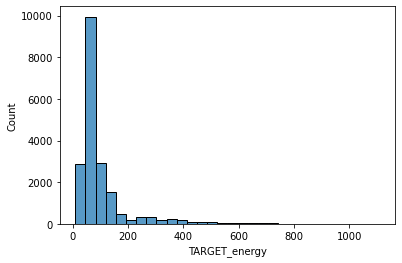

Mean usage of energy is: 101.5
Median usage of energy is: 60.0


In [13]:
sbn.histplot(df_appliance.TARGET_energy,bins = 30)
dplt.show()

print("Mean usage of energy is:", round(df_appliance.TARGET_energy.mean(), 2))
print("Median usage of energy is:", round(df_appliance.TARGET_energy.median(), 2))

Text(0.5, 0, 'TARGET_energy')

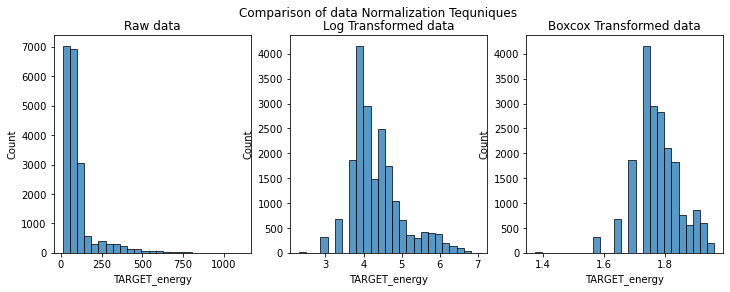

In [14]:
log_TARGET_energy = np.log(df_appliance.TARGET_energy)
boxcox_TARGET_energy = pd.Series(boxcox(df_appliance.TARGET_energy)[0])

fg, axzs = dplt.subplots(1, 3, figsize=(12,4))
fg.suptitle('Comparison of data Normalization Tequniques')

sbn.histplot(df_appliance.TARGET_energy,bins = 25, ax=axzs[0])
axzs[0].set_title('Raw data')

sbn.histplot(log_TARGET_energy, bins = 25, ax=axzs[1])
axzs[1].set_title('Log Transformed data')

sbn.histplot(boxcox_TARGET_energy, bins = 25, ax=axzs[2], )
axzs[2].set_title('Boxcox Transformed data')
dplt.xlabel('TARGET_energy')



[Text(0.5, 0, '')]

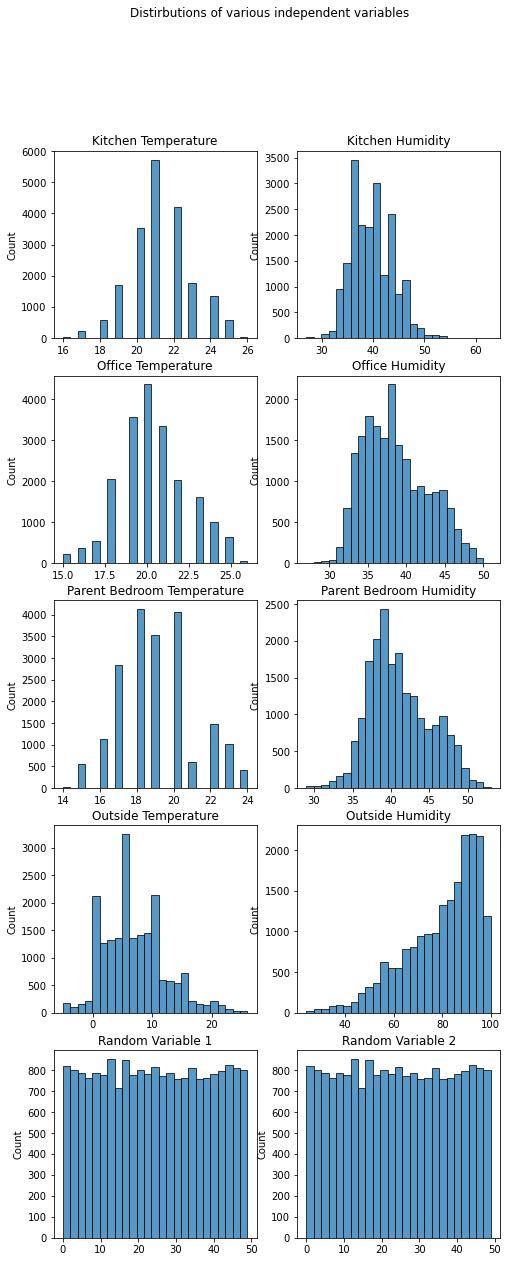

In [15]:
log_TARGET_energy = np.log(df_appliance.TARGET_energy)
boxcox_TARGET_energy = pd.Series(boxcox(df_appliance.TARGET_energy)[0])

fg, axzs = dplt.subplots(5, 2, figsize=(8,20))
fg.suptitle('Distirbutions of various independent variables')

sbn.histplot(df_appliance.tempKitchen,bins = 25, ax=axzs[0, 0])
axzs[0, 0].set_title('Kitchen Temperature')
axzs[0, 0].set(xlabel=None)

sbn.histplot(df_appliance.humidKitchen,bins = 25, ax=axzs[0, 1])
axzs[0, 1].set_title('Kitchen Humidity')
axzs[0, 1].set(xlabel=None)

sbn.histplot(df_appliance.tempOffice,bins = 25, ax=axzs[1, 0])
axzs[1, 0].set_title('Office Temperature')
axzs[1, 0].set(xlabel=None)

sbn.histplot(df_appliance.humidOffice,bins = 25, ax=axzs[1, 1])
axzs[1, 1].set_title('Office Humidity')
axzs[1, 1].set(xlabel=None)

sbn.histplot(df_appliance.tempParentRoom,bins = 25, ax=axzs[2, 0])
axzs[2, 0].set_title('Parent Bedroom Temperature')
axzs[2, 0].set(xlabel=None)

sbn.histplot(df_appliance.humidParentRoom,bins = 25, ax=axzs[2, 1])
axzs[2, 1].set_title('Parent Bedroom Humidity')
axzs[2, 1].set(xlabel=None)

sbn.histplot(df_appliance.tempOutside,bins = 25, ax=axzs[3, 0])
axzs[3, 0].set_title('Outside Temperature')
axzs[3, 0].set(xlabel=None)

sbn.histplot(df_appliance.humidOutside,bins = 25, ax=axzs[3, 1])
axzs[3, 1].set_title('Outside Humidity')
axzs[3, 1].set(xlabel=None)

sbn.histplot(df_appliance.rv1,bins = 25, ax=axzs[4, 0])
axzs[4, 0].set_title('Random Variable 1')
axzs[4, 0].set(xlabel=None)

sbn.histplot(df_appliance.rv2,bins = 25, ax=axzs[4, 1])
axzs[4, 1].set_title('Random Variable 2')
axzs[4, 1].set(xlabel=None)


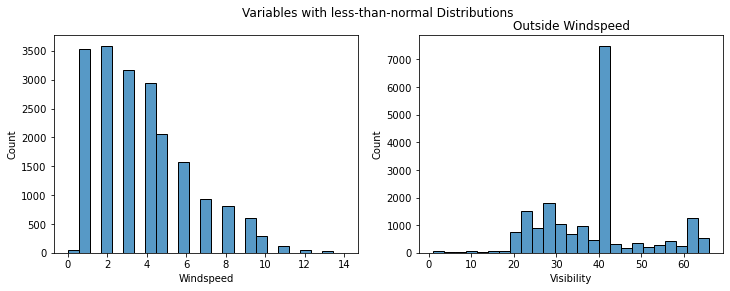

In [16]:
fg, axzs = dplt.subplots(1, 2, figsize=(12,4))
fg.suptitle('Variables with less-than-normal Distributions')


sbn.histplot(df_appliance.Windspeed, bins = 25, ax=axzs[0])
axzs[1].set_title('Outside Windspeed')

sbn.histplot(df_appliance.Visibility, bins = 25, ax=axzs[1])

dplt.show()

In [17]:
def gt_weekend(dt_string):

    d_ts = pd.Timestamp(dt_string)
    day_Name = d_ts.day_name()

    if day_Name in ['Saturday', 'Sunday']:
        return 1
  
    else:
        return 0

def get_t_o_d(dt_string):

    dt_o = datetime.strptime(dt_string, '%Y-%m-%d %H:%M:%S')
    hour = dt_o.hour

    if hour in range(6, 12):
        return "morning"

    elif hour in range(12, 18):
        return "afternoon"

    elif hour in range(18, 23):
        return 'evening'

    elif hour in [23, 24, 0, 1, 2, 3, 4, 5]:
        return 'night'

    return 'Something went wrong'

df_appliance['isWeekend'] = df_appliance['date'].apply(gt_weekend)
df_appliance['timeOfDay'] = df_appliance['date'].apply(get_t_o_d)

df_appliance = df_appliance.astype({"isWeekend": 'int'})


df_appliance[['date', 'isWeekend', 'timeOfDay']].head(10)

,date,isWeekend,timeOfDay
0,2016-04-19 20:30:00,0,evening
1,2016-03-05 04:40:00,1,night
2,2016-03-14 12:40:00,0,afternoon
3,2016-01-22 15:30:00,0,afternoon
4,2016-02-10 00:40:00,0,night
5,2016-02-16 15:40:00,0,afternoon
6,2016-02-13 01:50:00,1,night
7,2016-01-24 22:30:00,1,evening
8,2016-03-23 10:20:00,0,morning
9,2016-03-03 12:10:00,0,afternoon


C:\Users\SUNNY\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\SUNNY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUNNY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


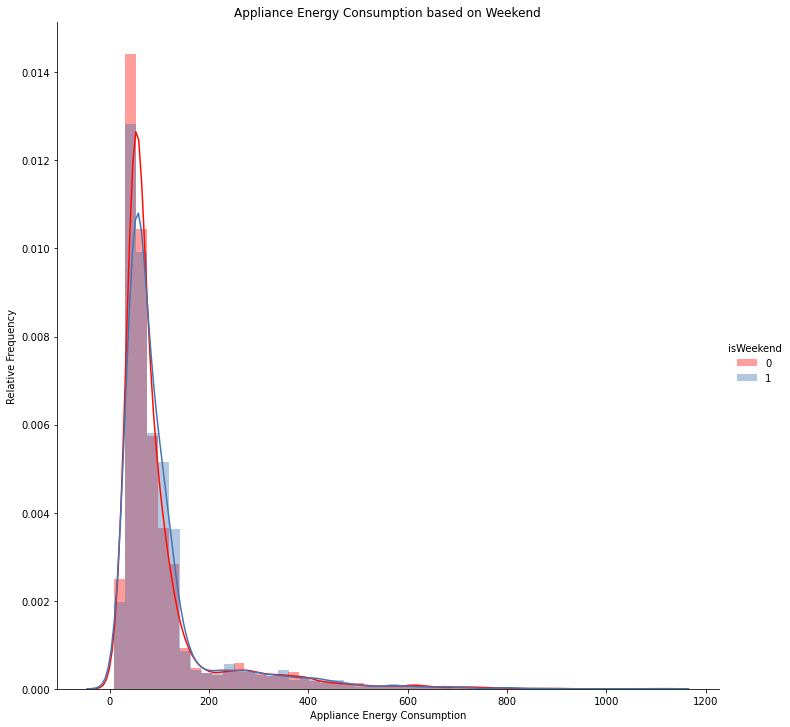

In [18]:
colors = ["#FF0B04", "#4374B3"]
sbn.set_palette(sbn.color_palette(colors))

sbn.FacetGrid(df_appliance,hue='isWeekend',size=10).map(sbn.distplot,'TARGET_energy').add_legend()
dplt.title('Appliance Energy Consumption based on Weekend')
dplt.xlabel('Appliance Energy Consumption')
dplt.ylabel('Relative Frequency')
dplt.show()

- Energy consumption in weekdays is more than the weekends

In [19]:
from scipy.stats import ttest_ind

tt_weekend = ttest_ind(df_appliance[df_appliance['isWeekend'] == 1]['TARGET_energy'], df_appliance[df_appliance['isWeekend'] == 0]['TARGET_energy'])
print('With a p value of:', round(tt_weekend[1], 4), 'we can reject the null hypothesis that the appliance consumption is different on weekdays than on weekends')

With a p value of: 0.0633 we can reject the null hypothesis that the appliance consumption is different on weekdays than on weekends


In [20]:
from scipy.stats import f_oneway

dfMorning = df_appliance[df_appliance['timeOfDay'] == 'morning']['TARGET_energy']
datafternoon = df_appliance[df_appliance['timeOfDay'] == 'afternoon']['TARGET_energy']
datevening = df_appliance[df_appliance['timeOfDay'] == 'evening']['TARGET_energy']
dfNight = df_appliance[df_appliance['timeOfDay'] == 'night']['TARGET_energy']

anova_timeOfDay = f_oneway(dfMorning,datafternoon,datevening,dfNight)
print('With a F Statistic of:', round(anova_timeOfDay[0], 4), 'and an incredibly low P-value, we can reject the null hypothesis that the appliance consumption is different accross different times of the day')


With a F Statistic of: 707.8529 and an incredibly low P-value, we can reject the null hypothesis that the appliance consumption is different accross different times of the day


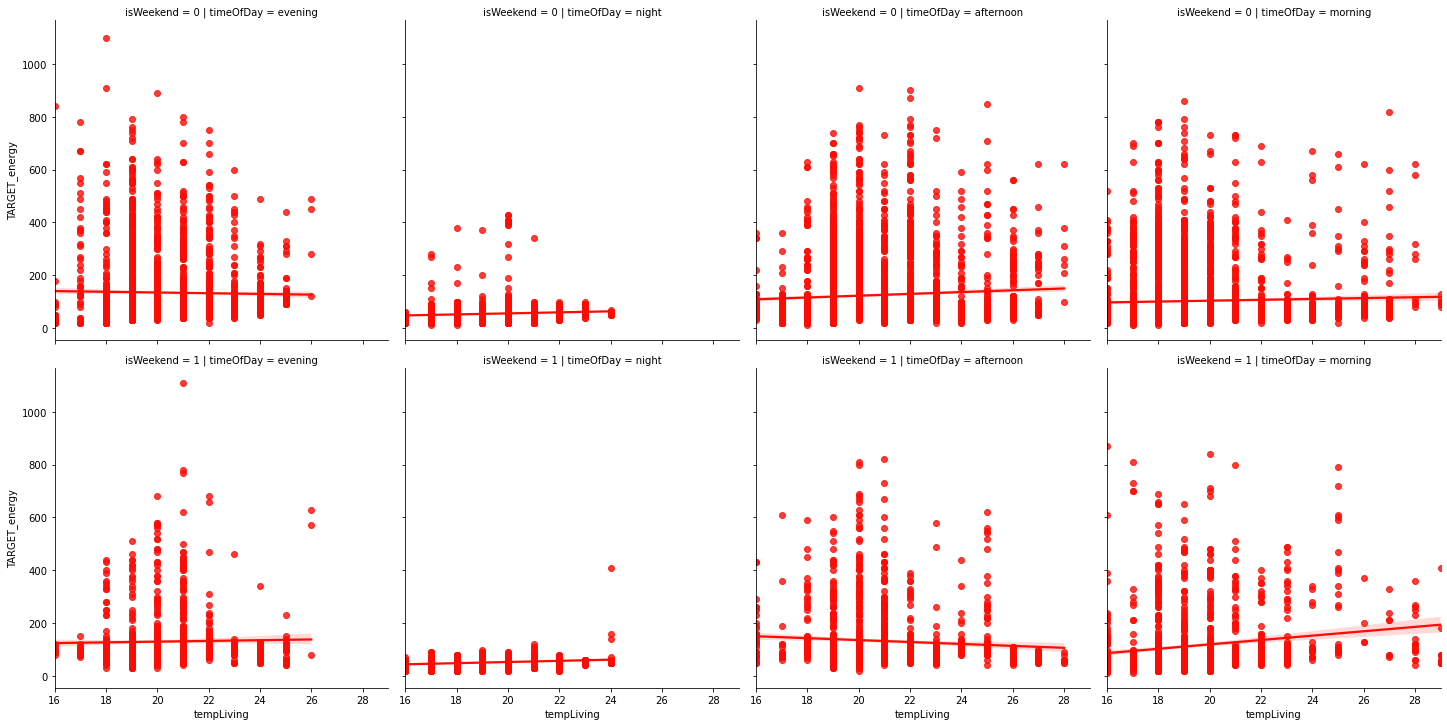

In [21]:
sbn.lmplot(x="tempLiving", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

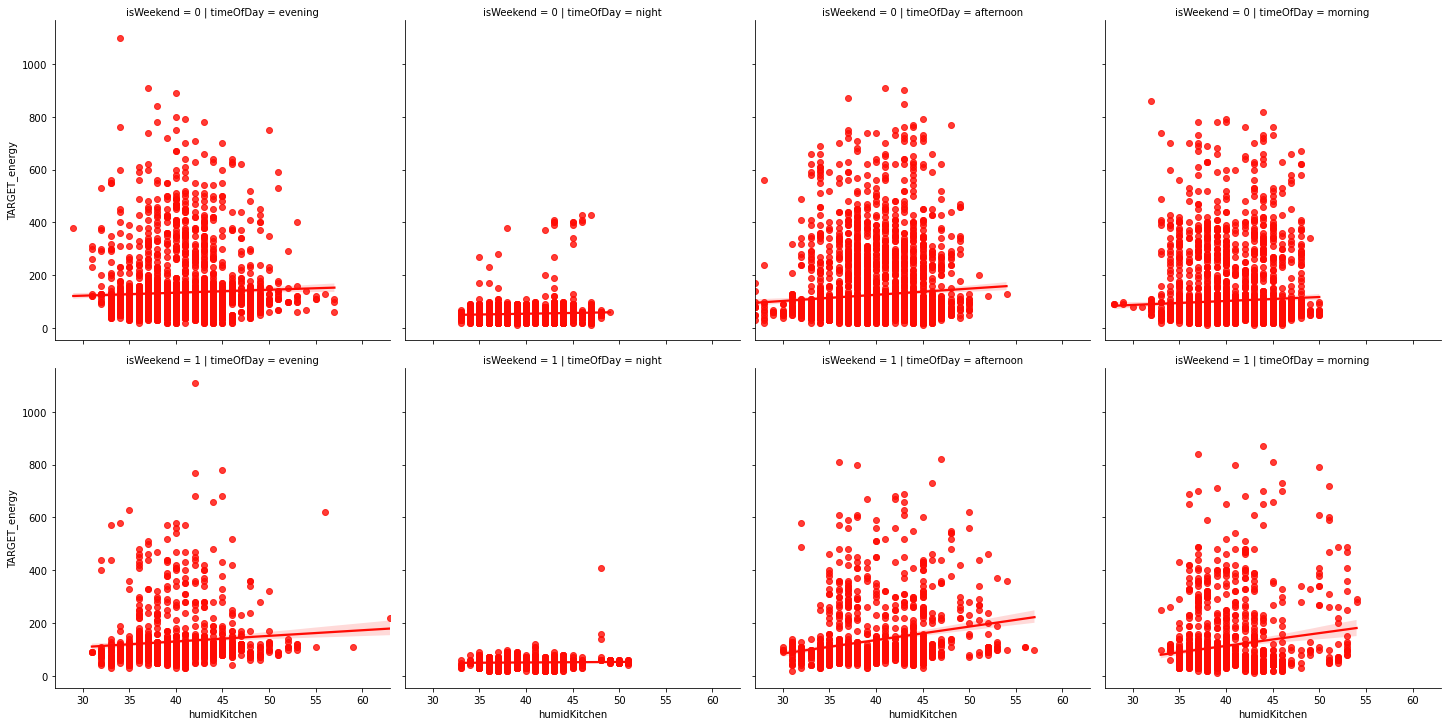

In [22]:
sbn.lmplot(x="humidKitchen", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

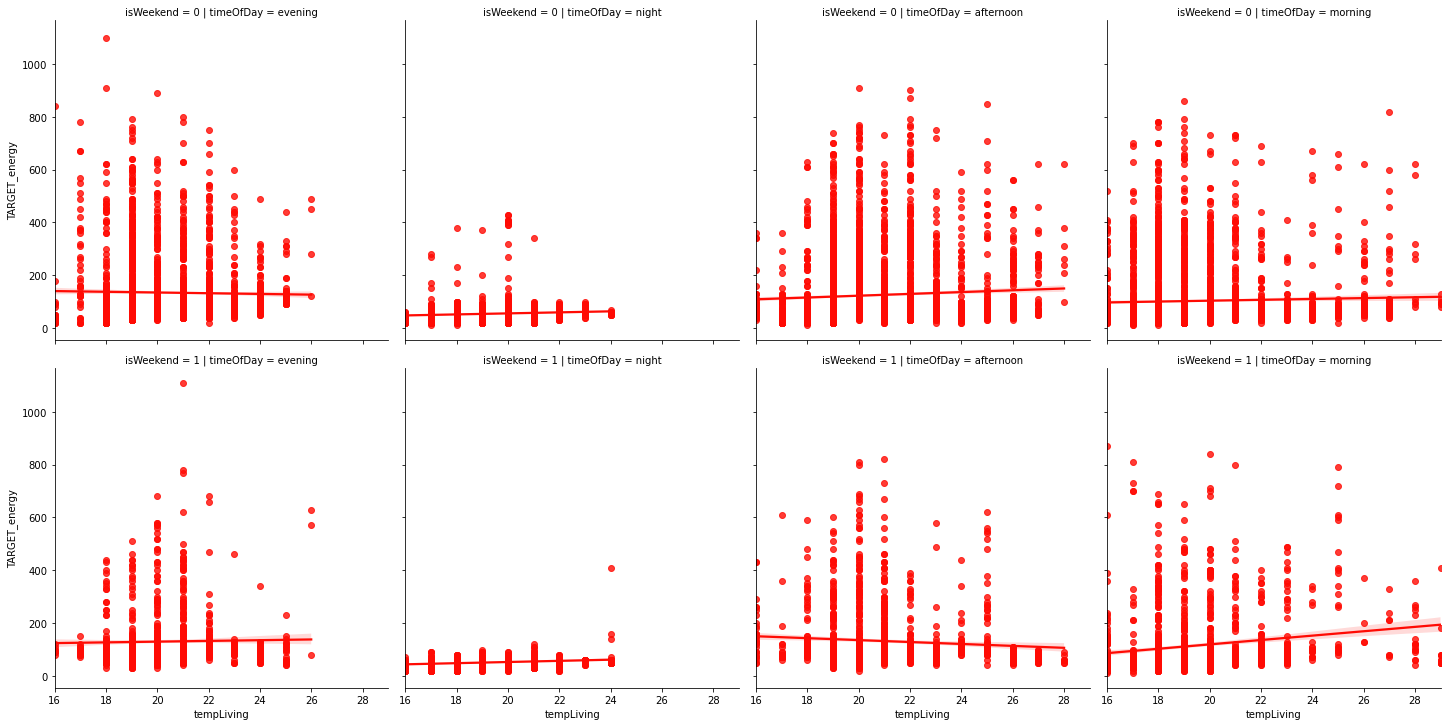

In [23]:
sbn.lmplot(x="tempLiving", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

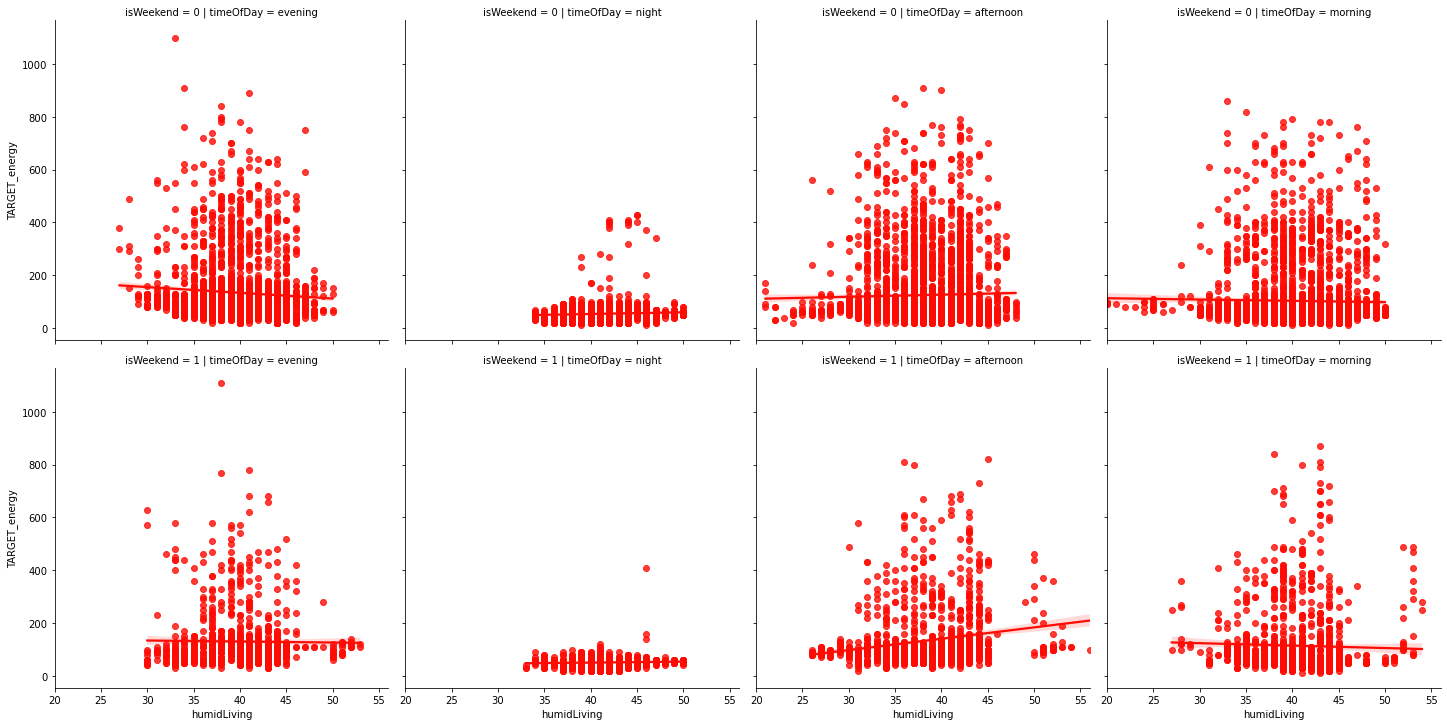

In [24]:
sbn.lmplot(x="humidLiving", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

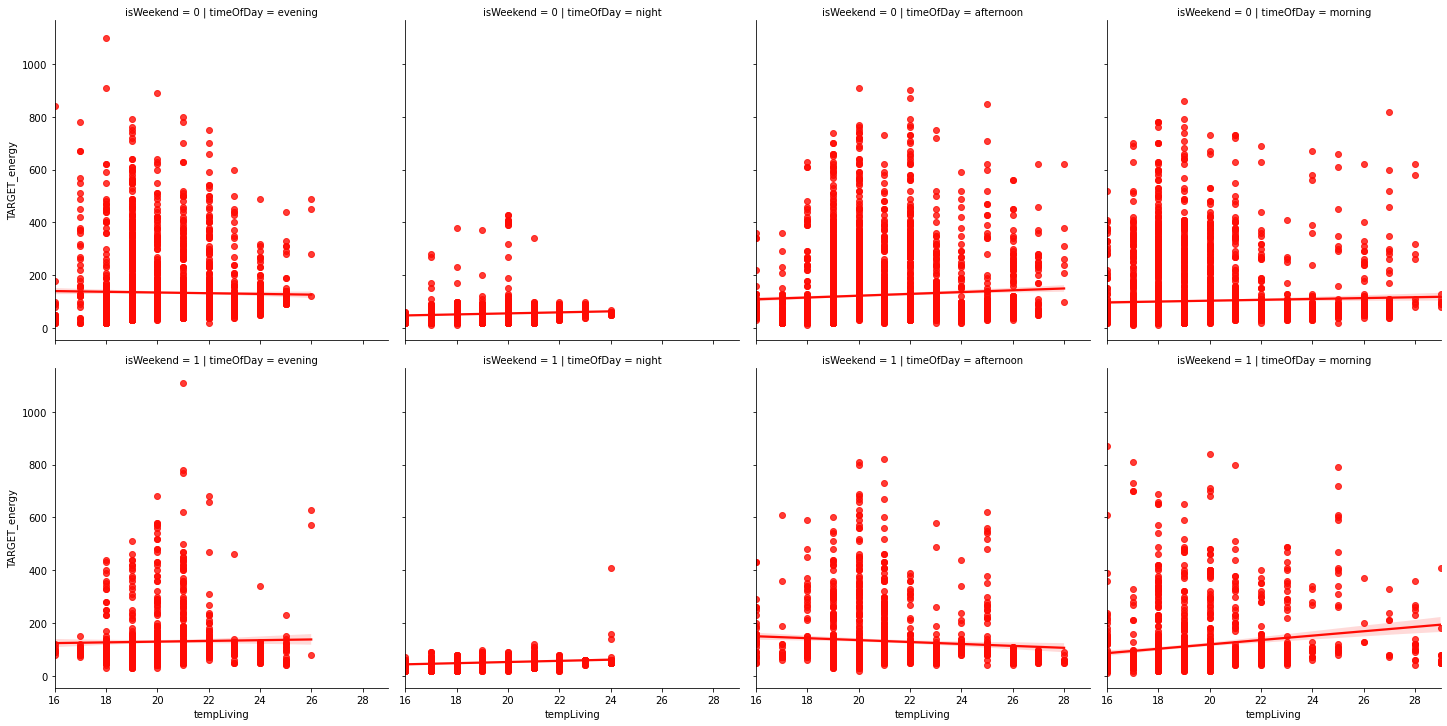

In [25]:
sbn.lmplot(x="tempLiving", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

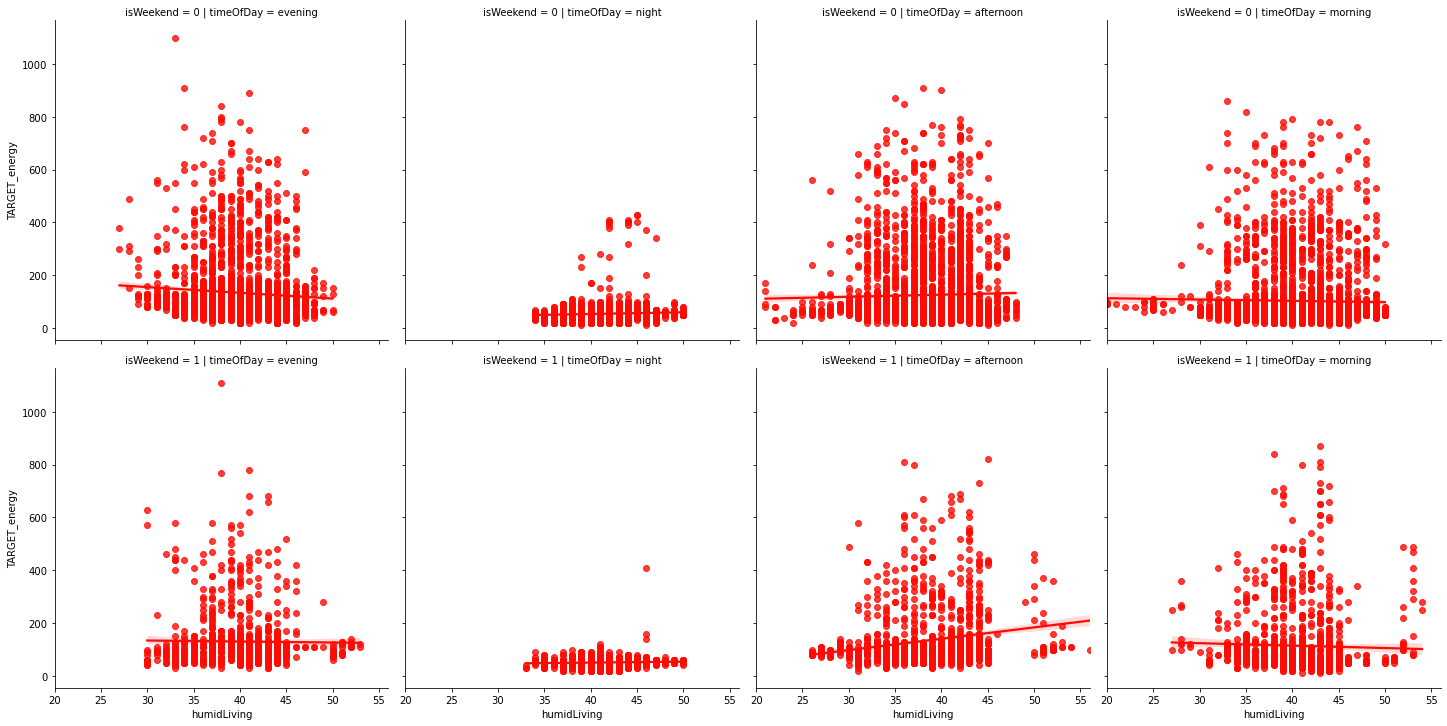

In [26]:
sbn.lmplot(x="humidLiving", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

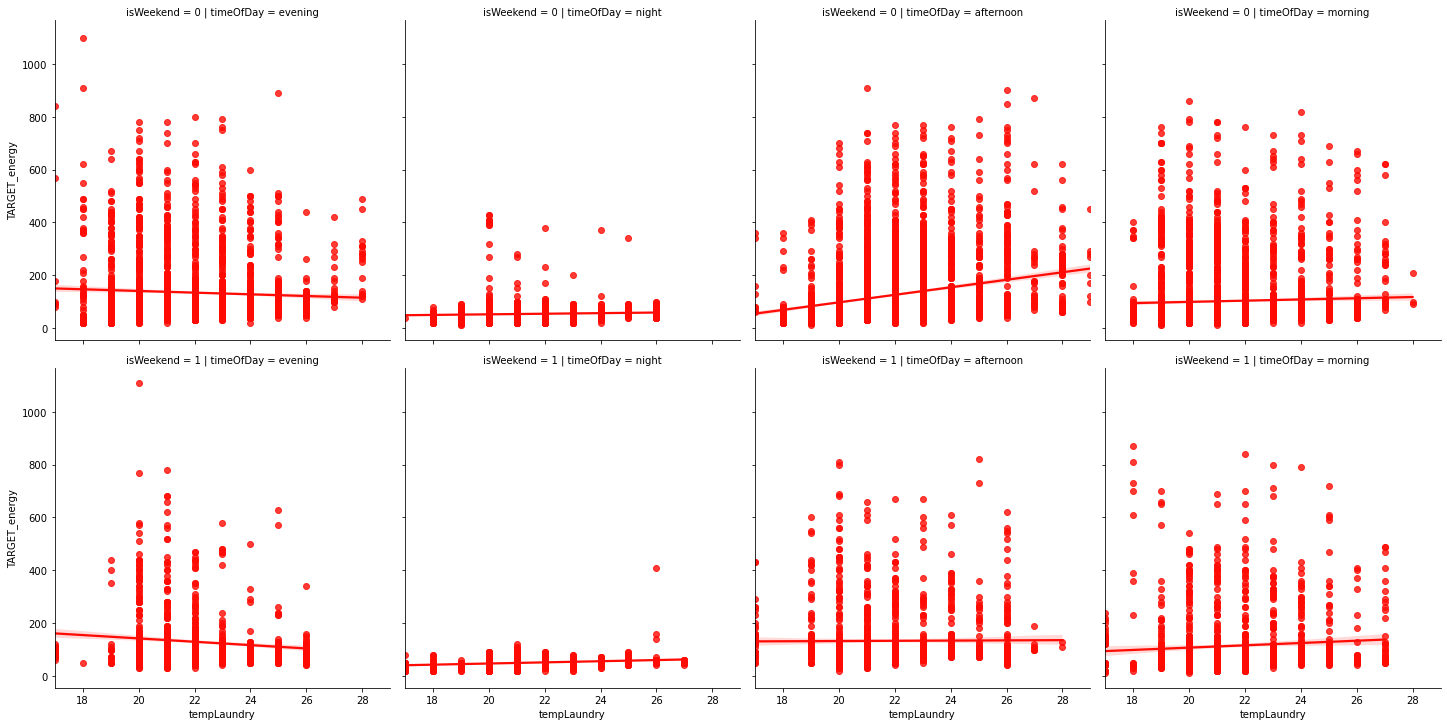

In [27]:
sbn.lmplot(x="tempLaundry", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

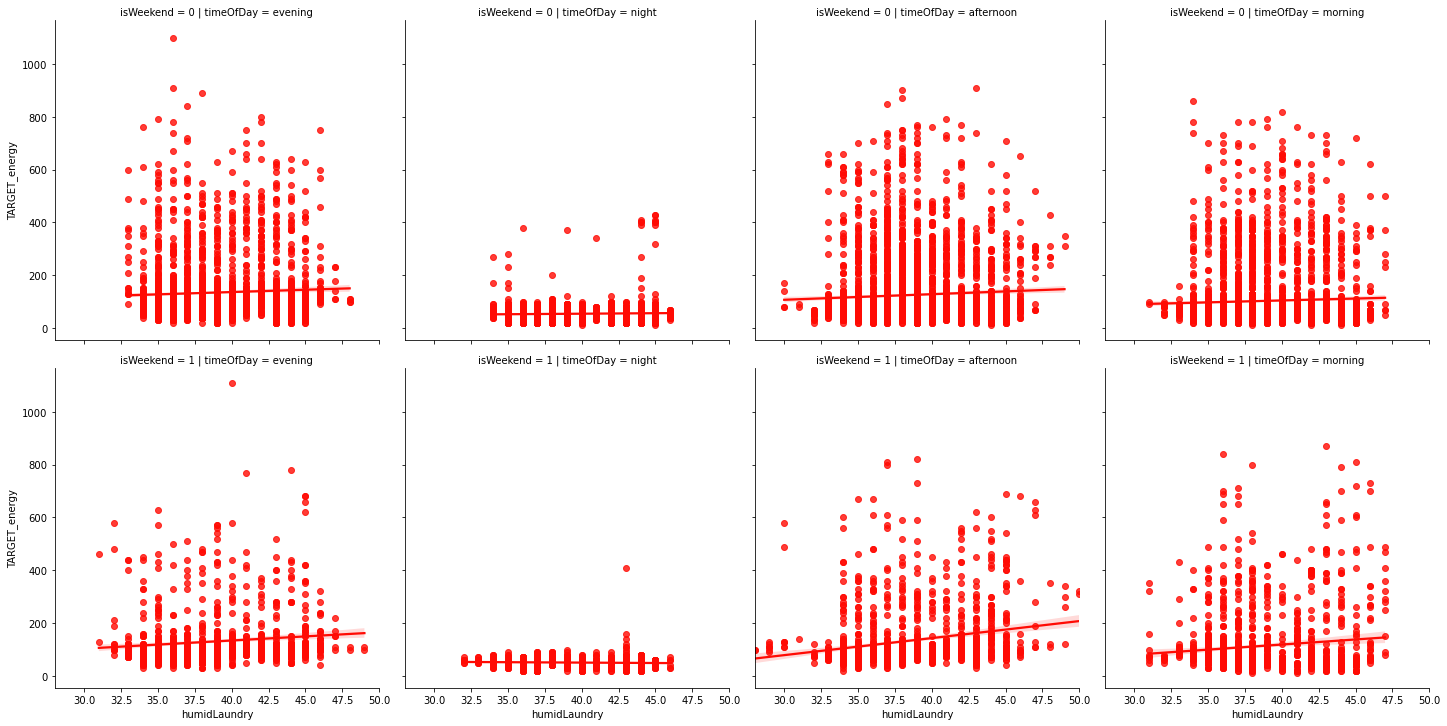

In [28]:
sbn.lmplot(x="humidLaundry", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

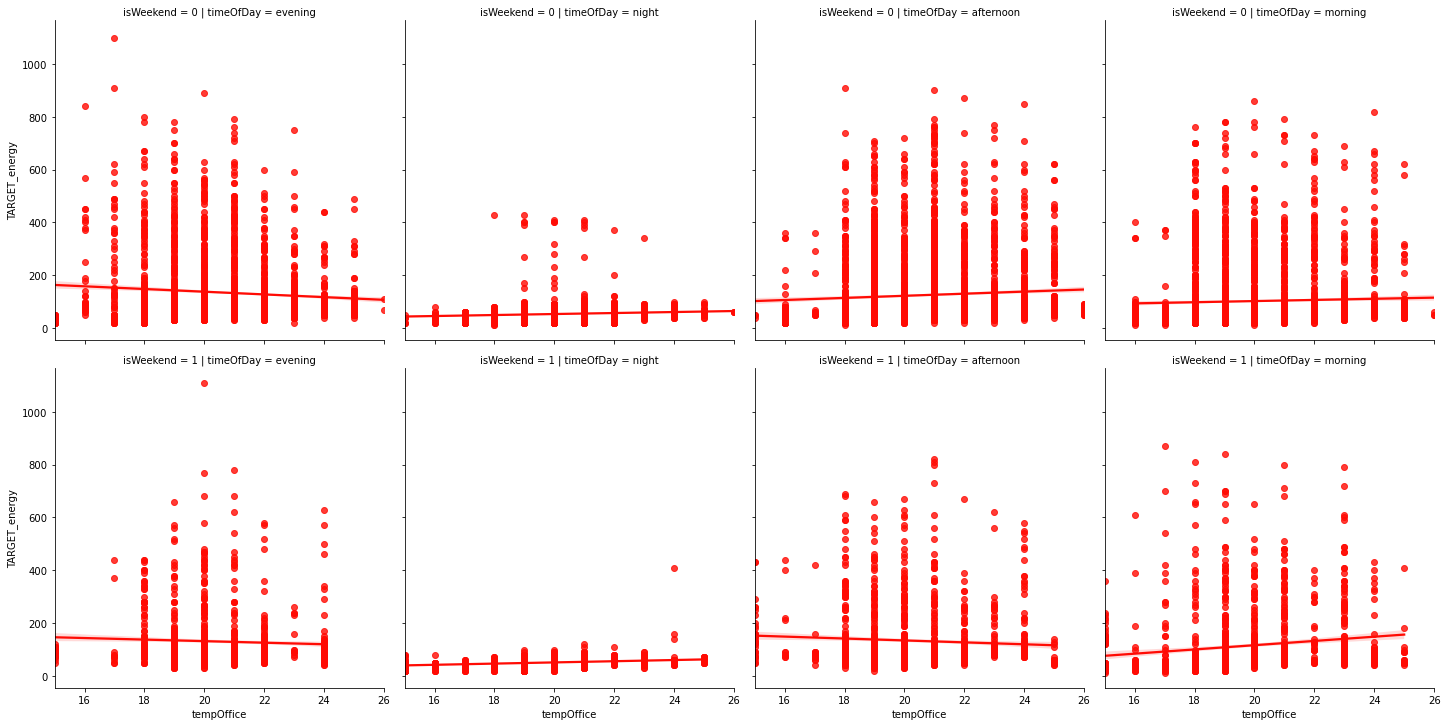

In [29]:
sbn.lmplot(x="tempOffice", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

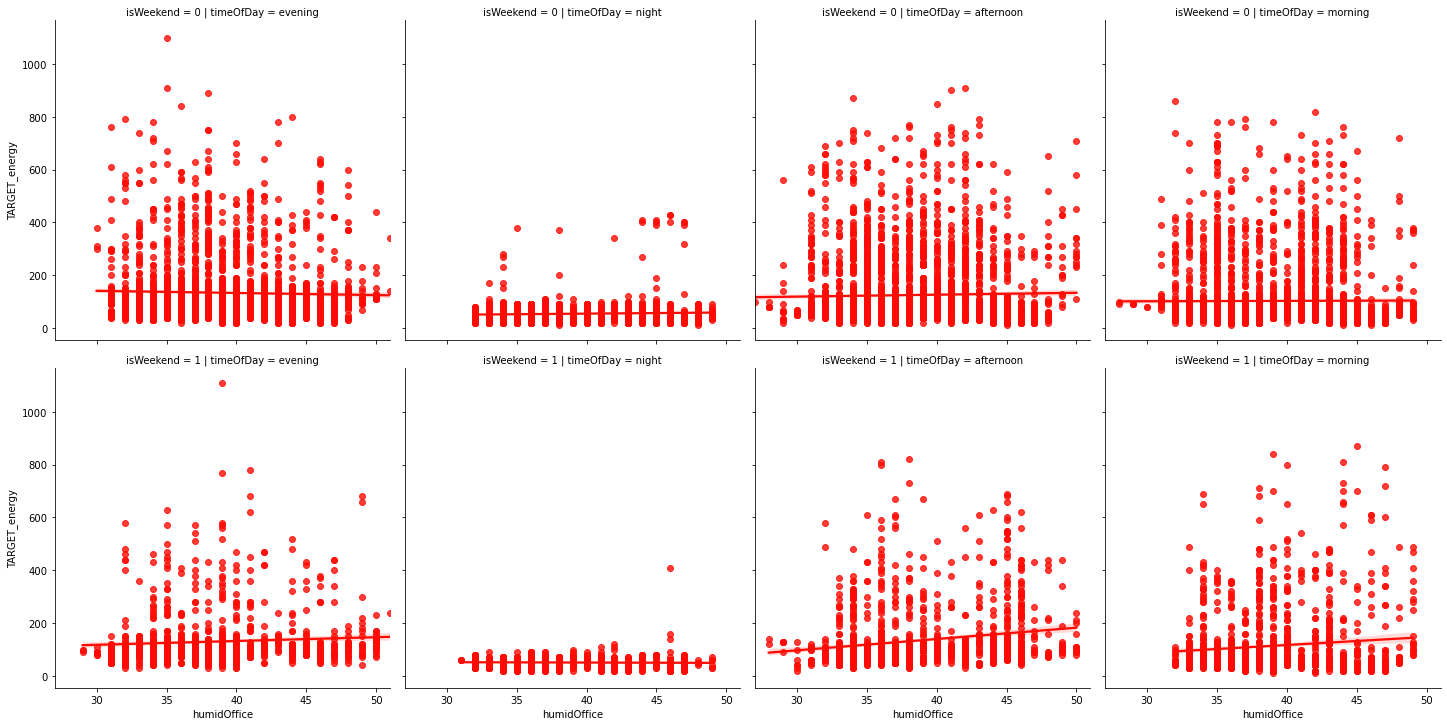

In [30]:
sbn.lmplot(x="humidOffice", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

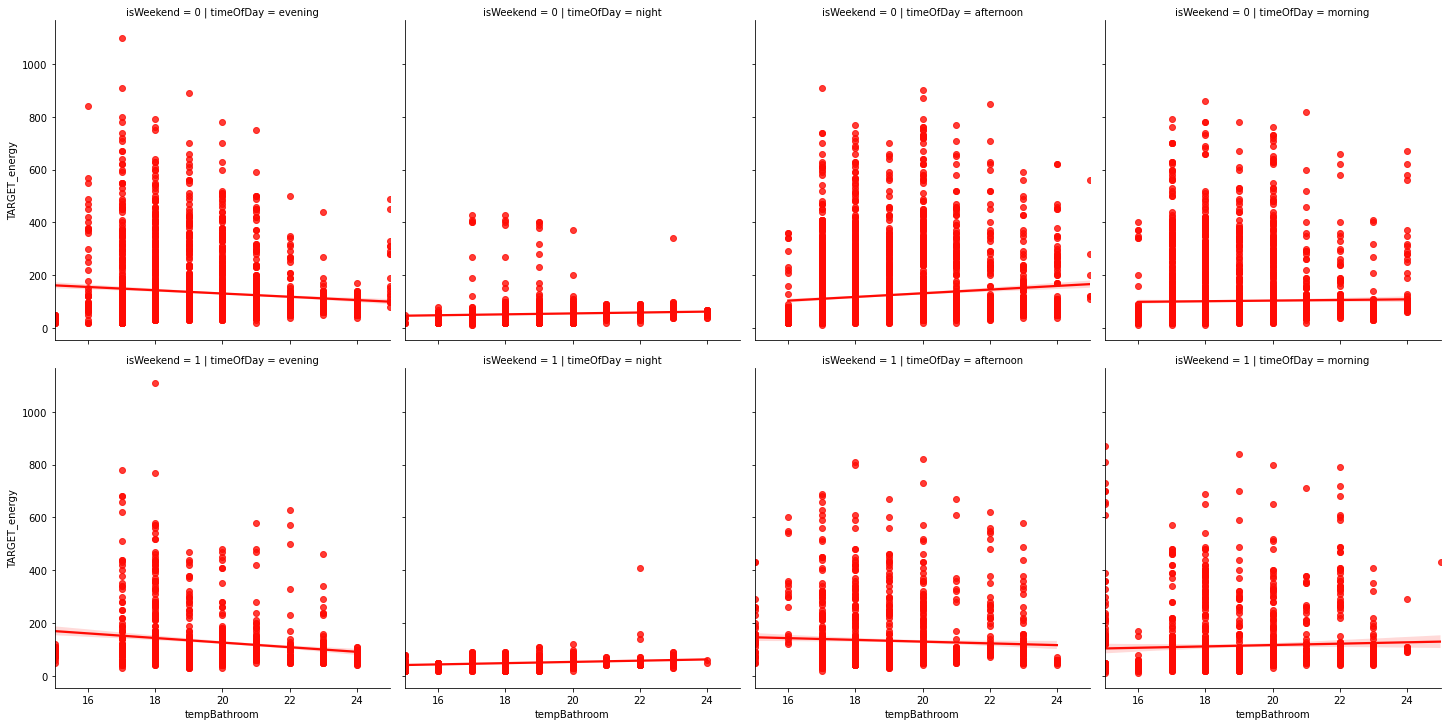

In [31]:
sbn.lmplot(x="tempBathroom", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

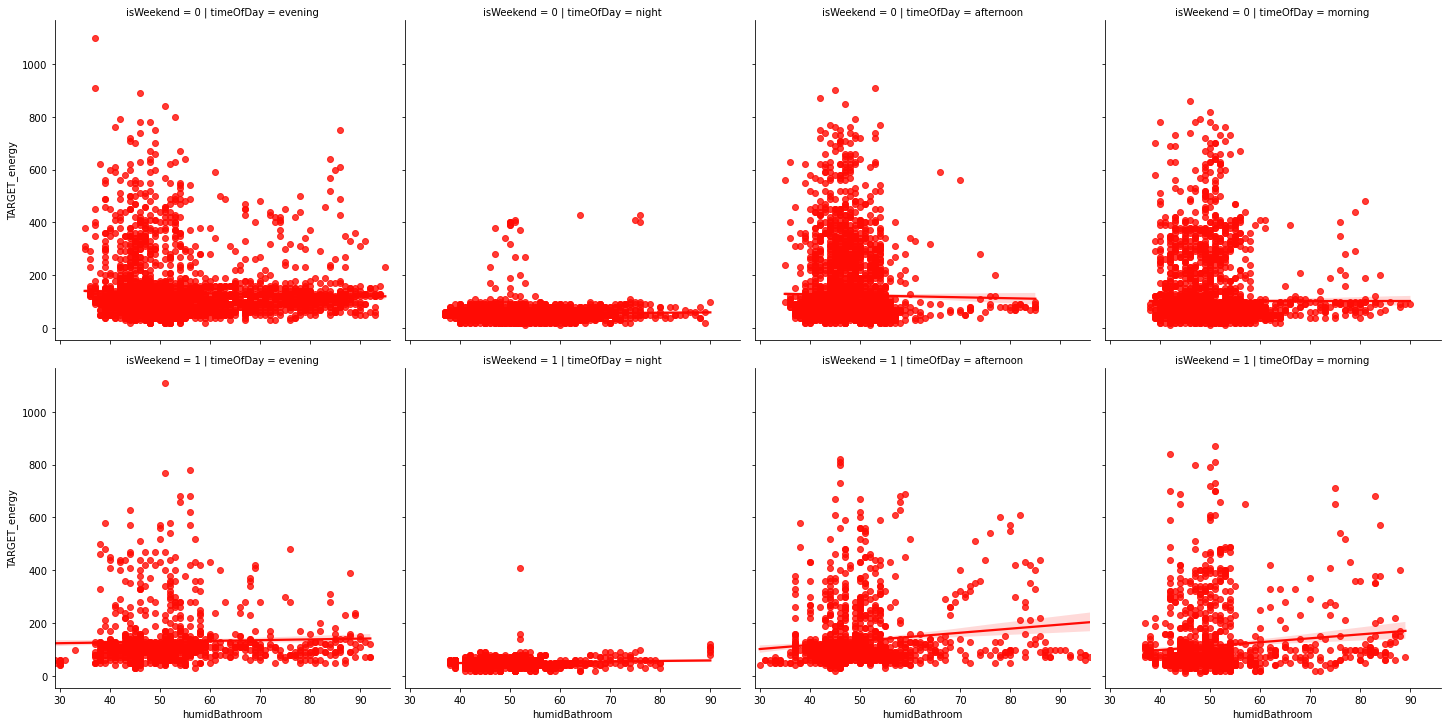

In [32]:
sbn.lmplot(x="humidBathroom", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

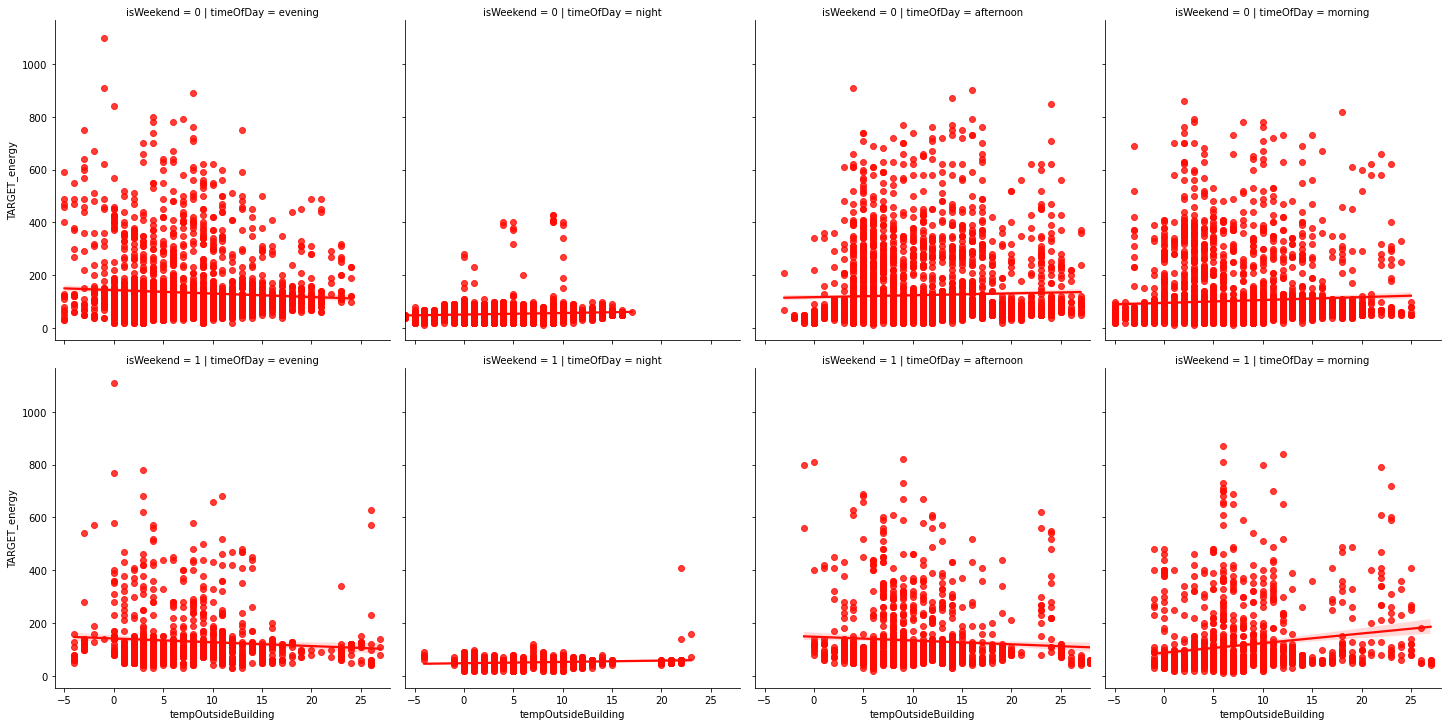

In [33]:
sbn.lmplot(x="tempOutsideBuilding", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

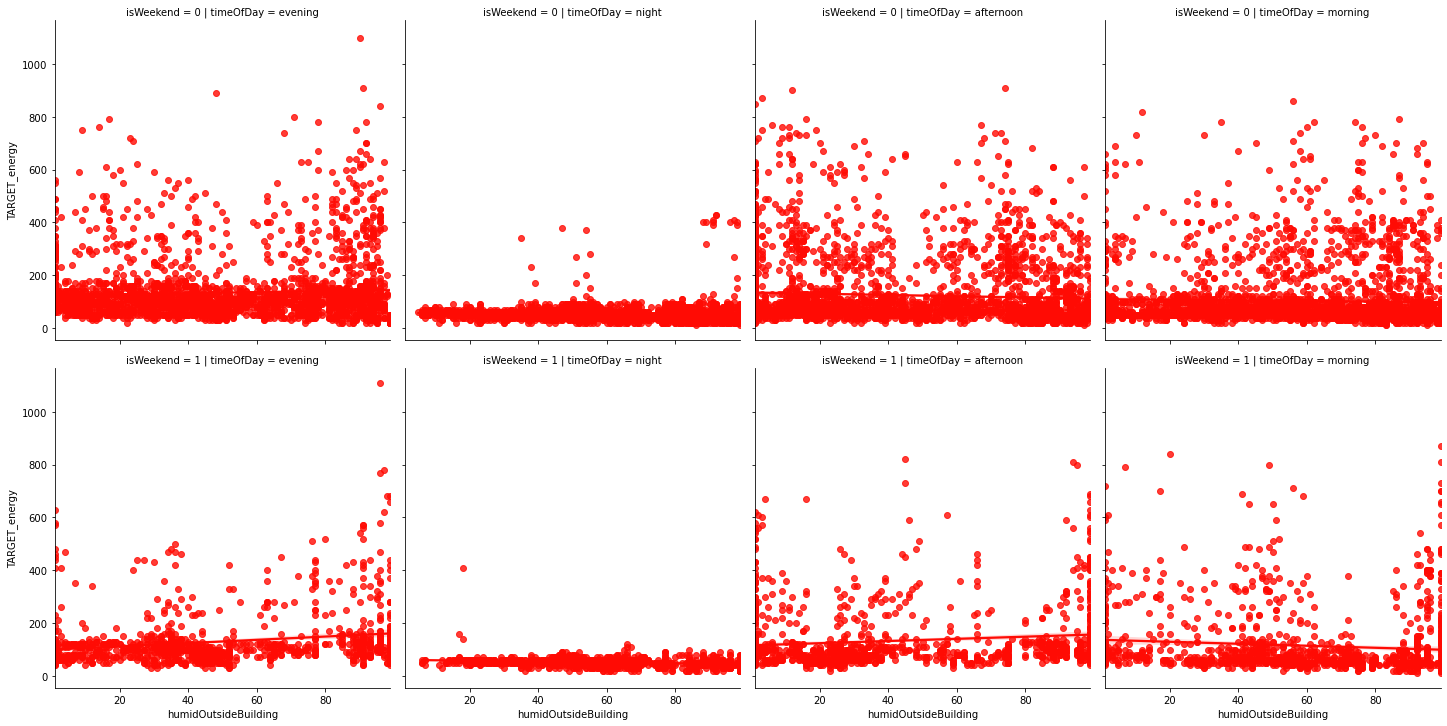

In [34]:
sbn.lmplot(x="humidOutsideBuilding", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

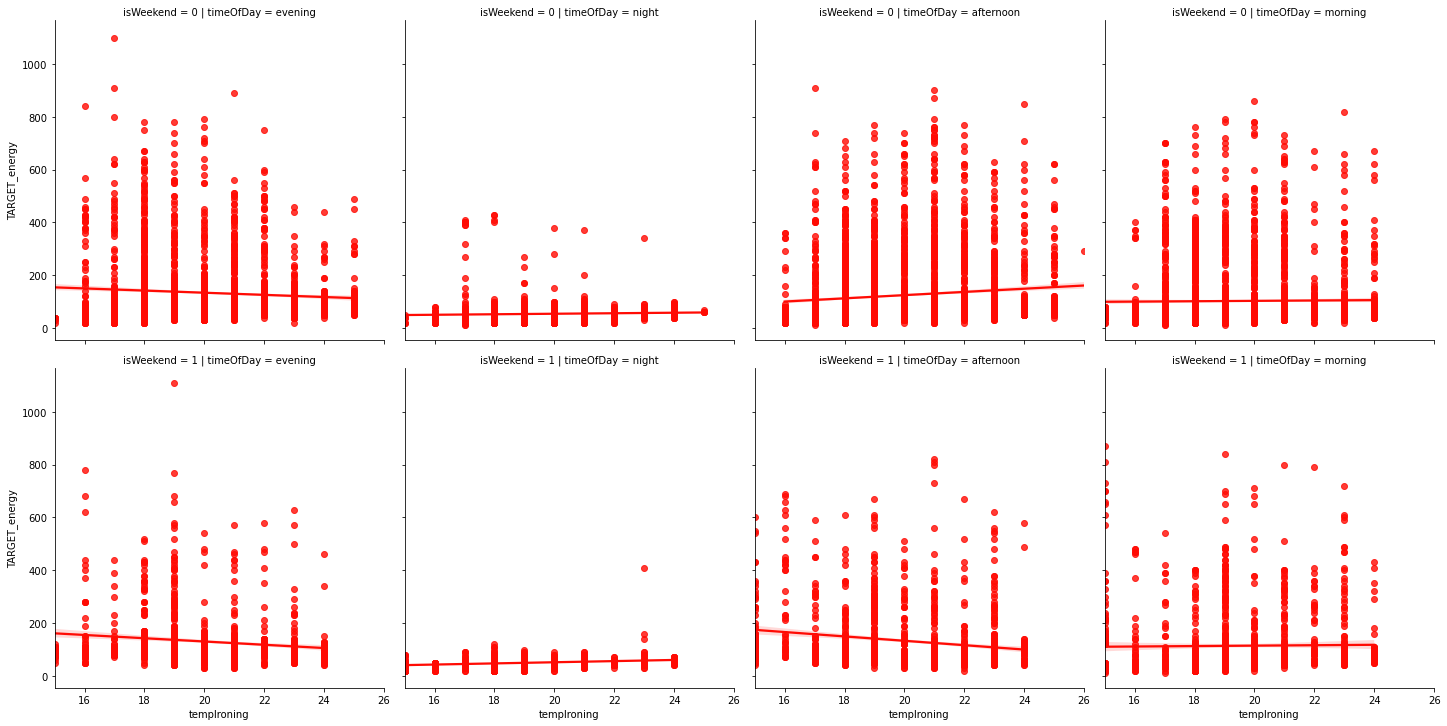

In [35]:
sbn.lmplot(x="tempIroning", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

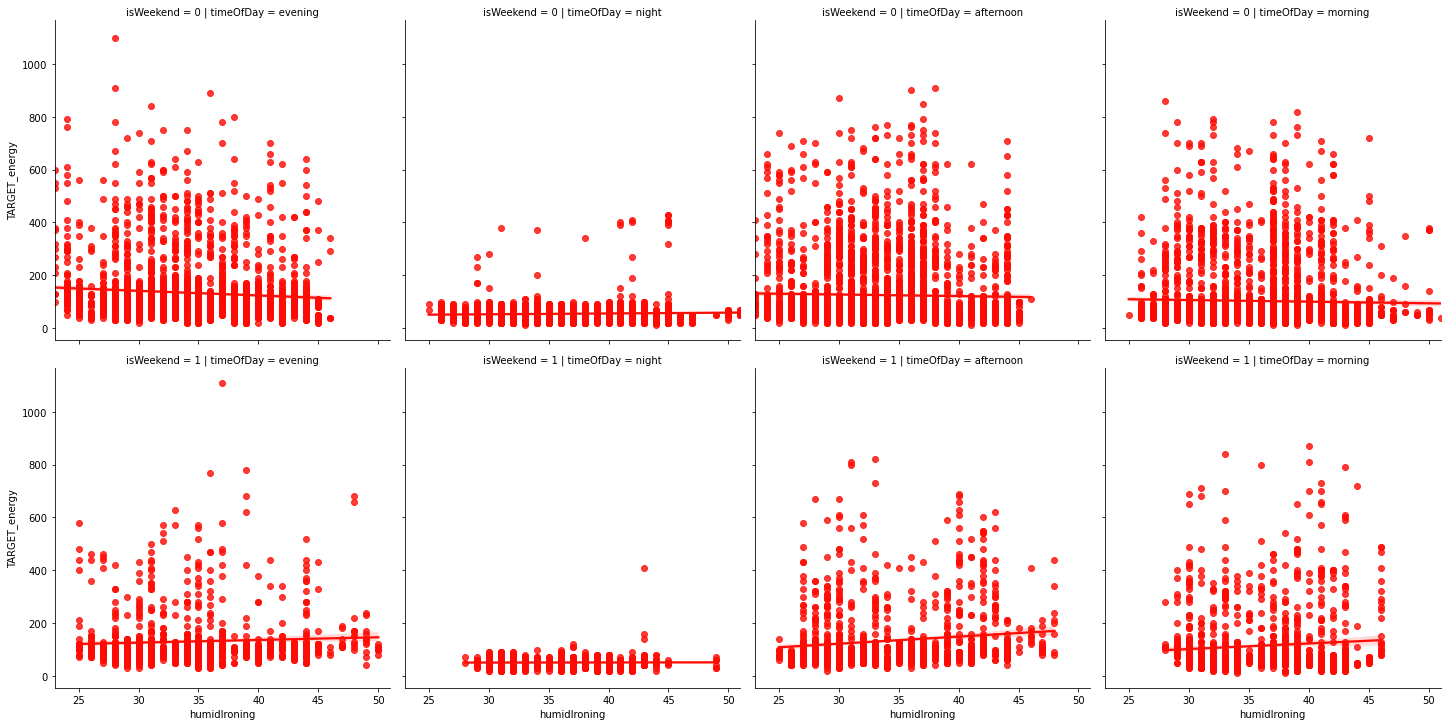

In [36]:
sbn.lmplot(x="humidIroning", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

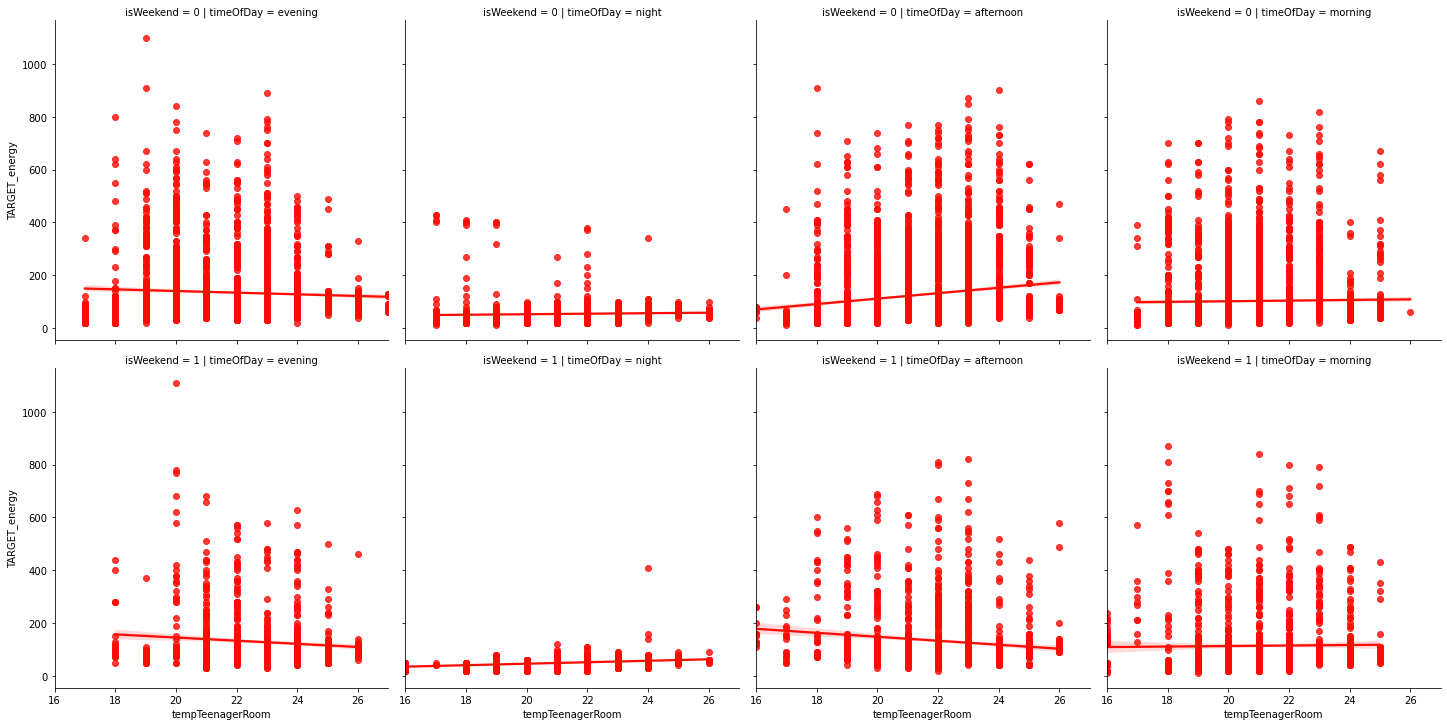

In [37]:
sbn.lmplot(x="tempTeenagerRoom", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

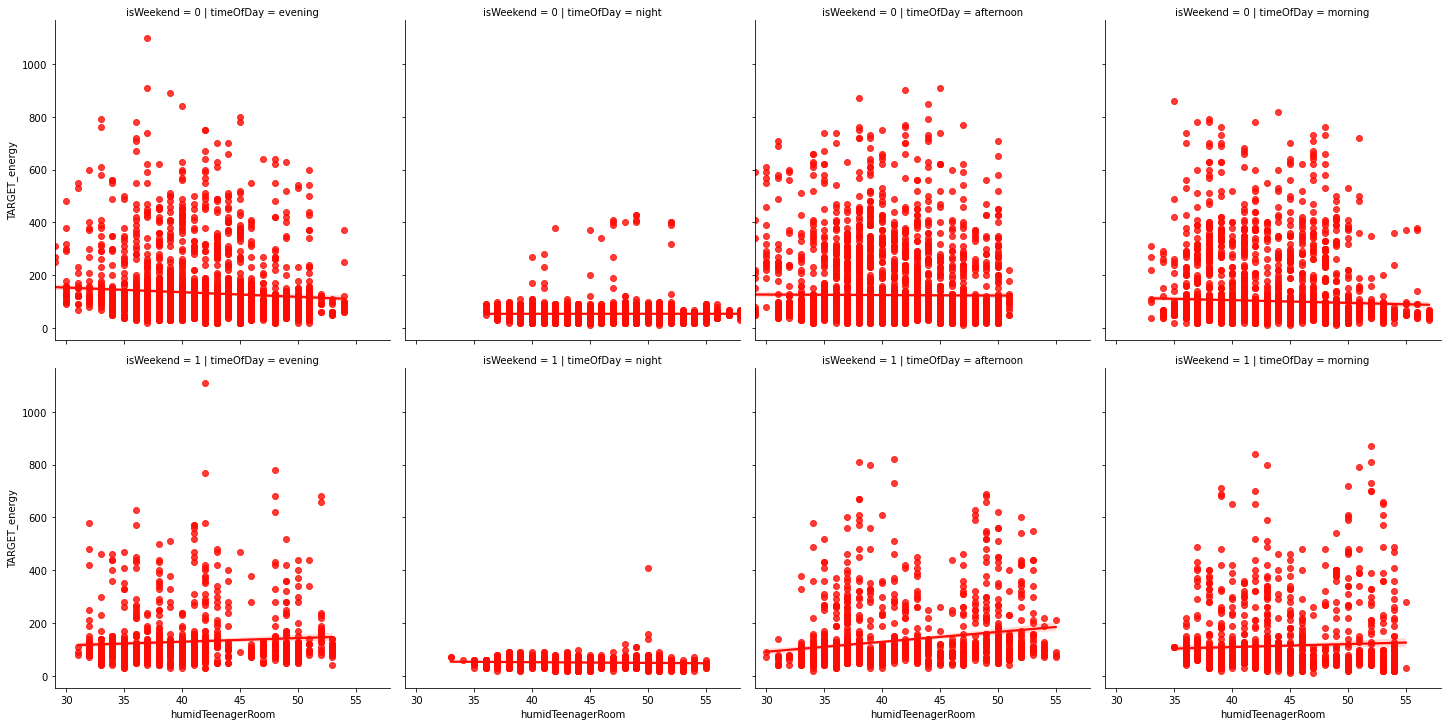

In [38]:
sbn.lmplot(x="humidTeenagerRoom", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

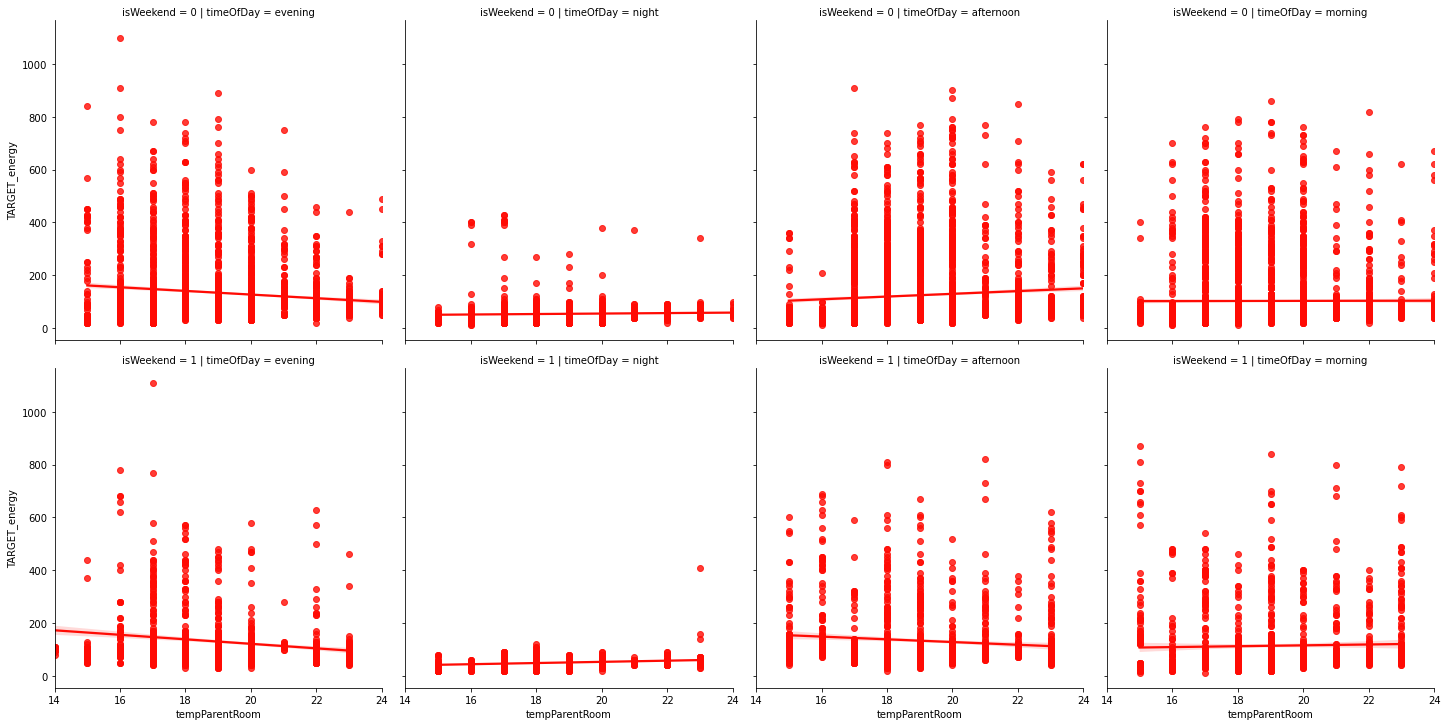

In [39]:
sbn.lmplot(x="tempParentRoom", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

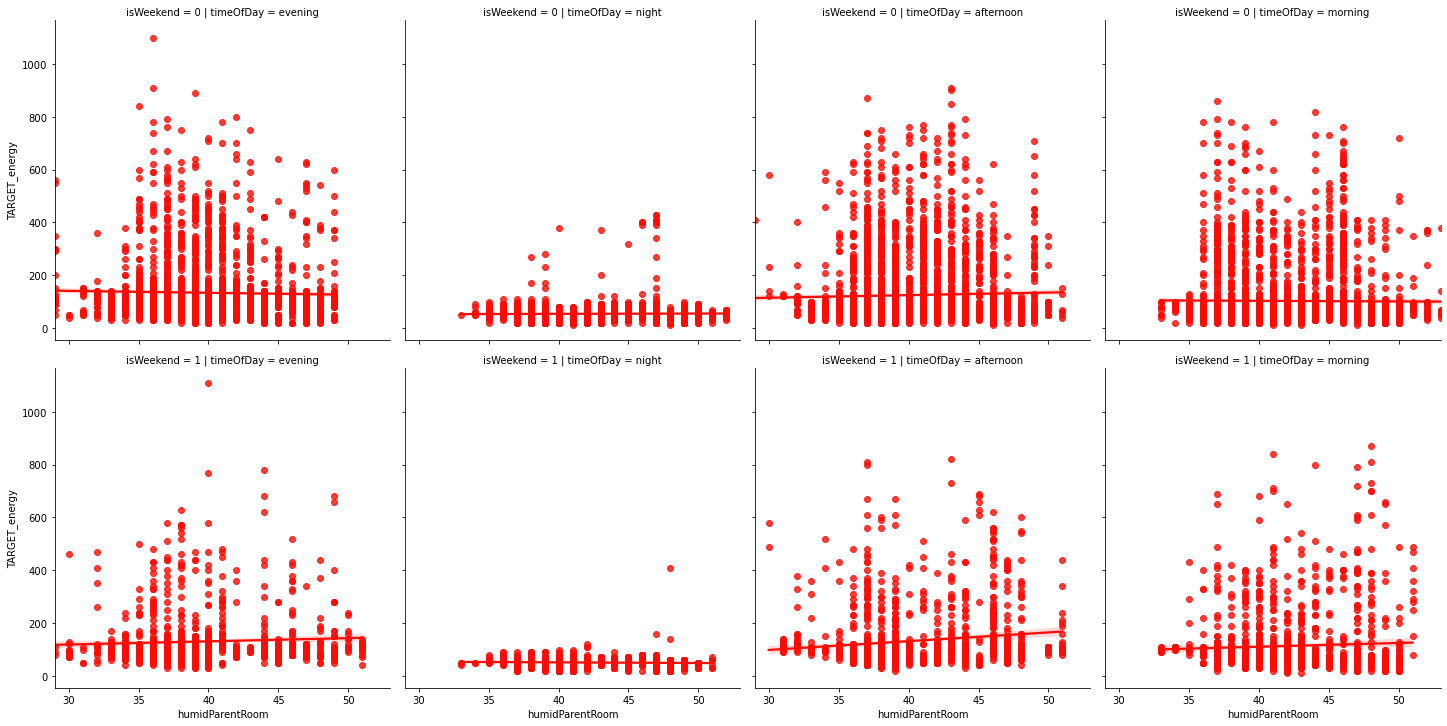

In [40]:
sbn.lmplot(x="humidParentRoom", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

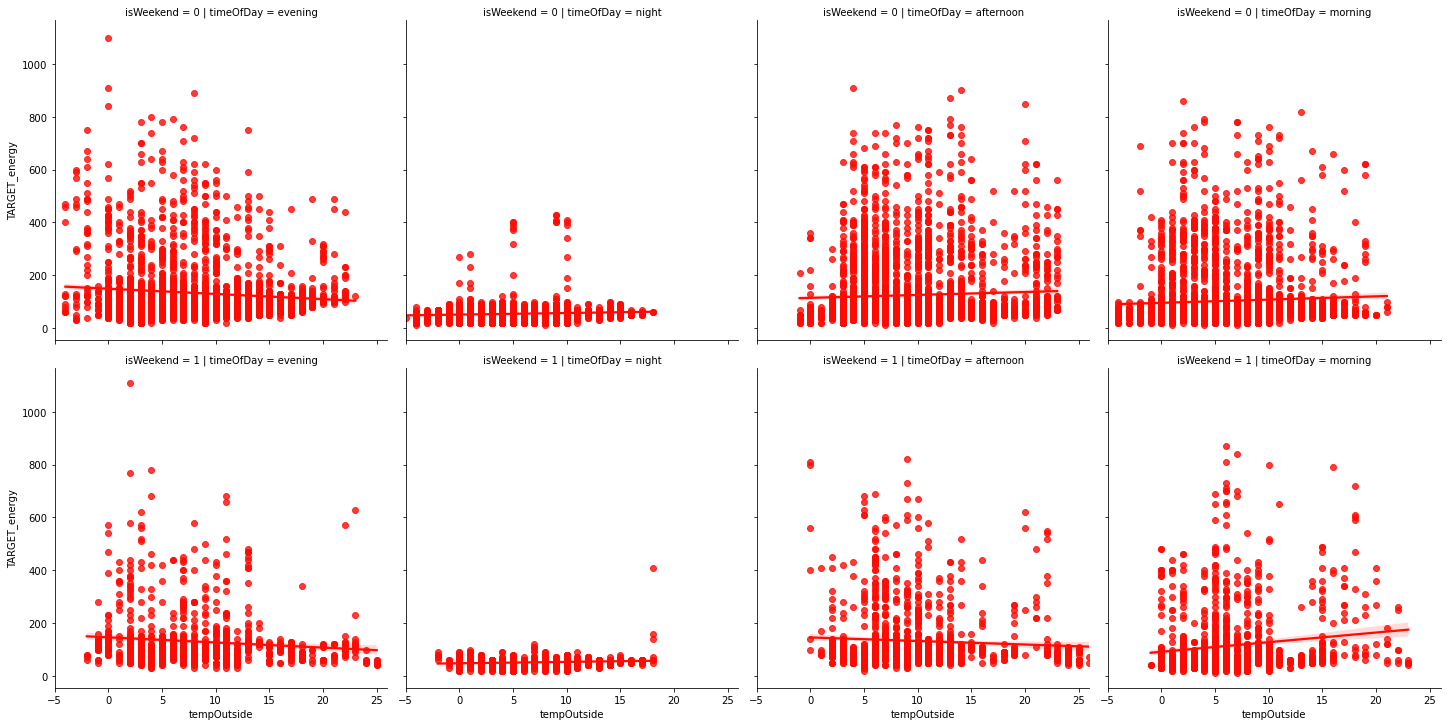

In [41]:
sbn.lmplot(x="tempOutside", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

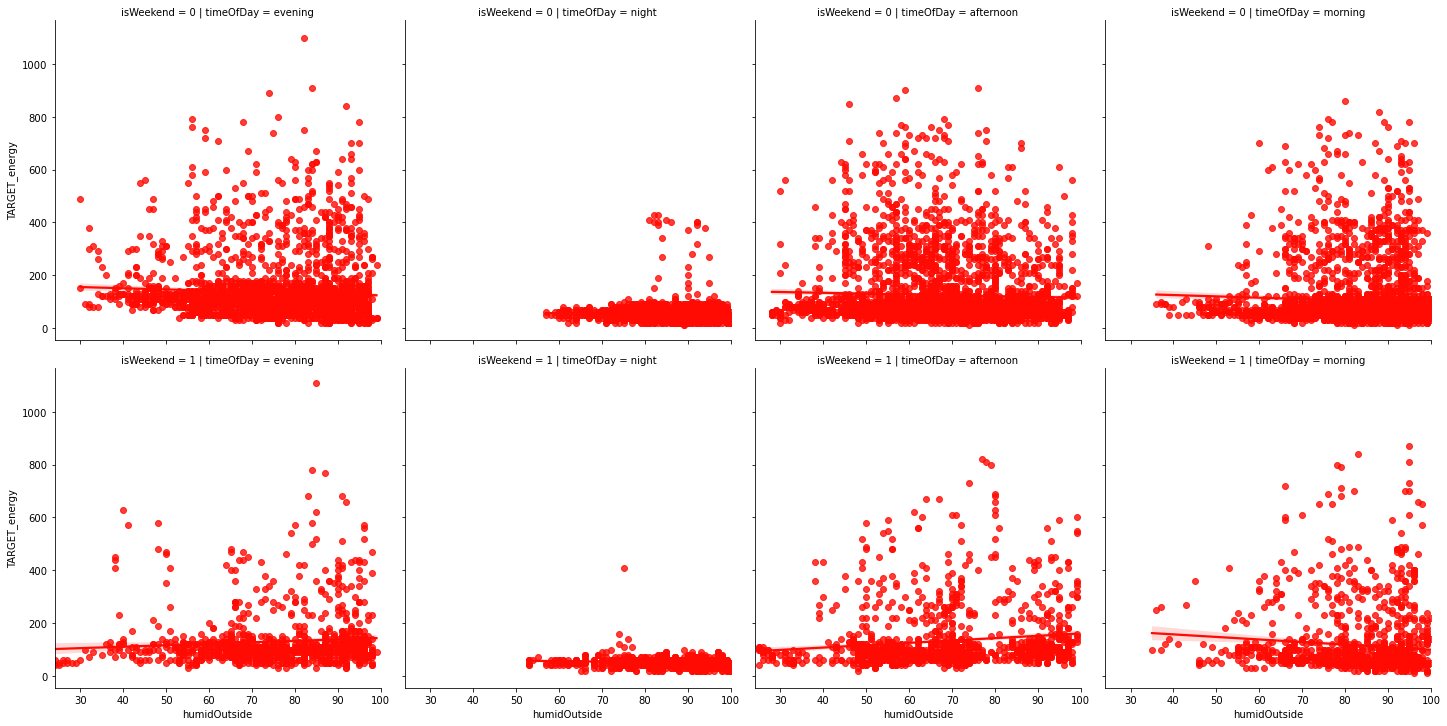

In [42]:
sbn.lmplot(x="humidOutside", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

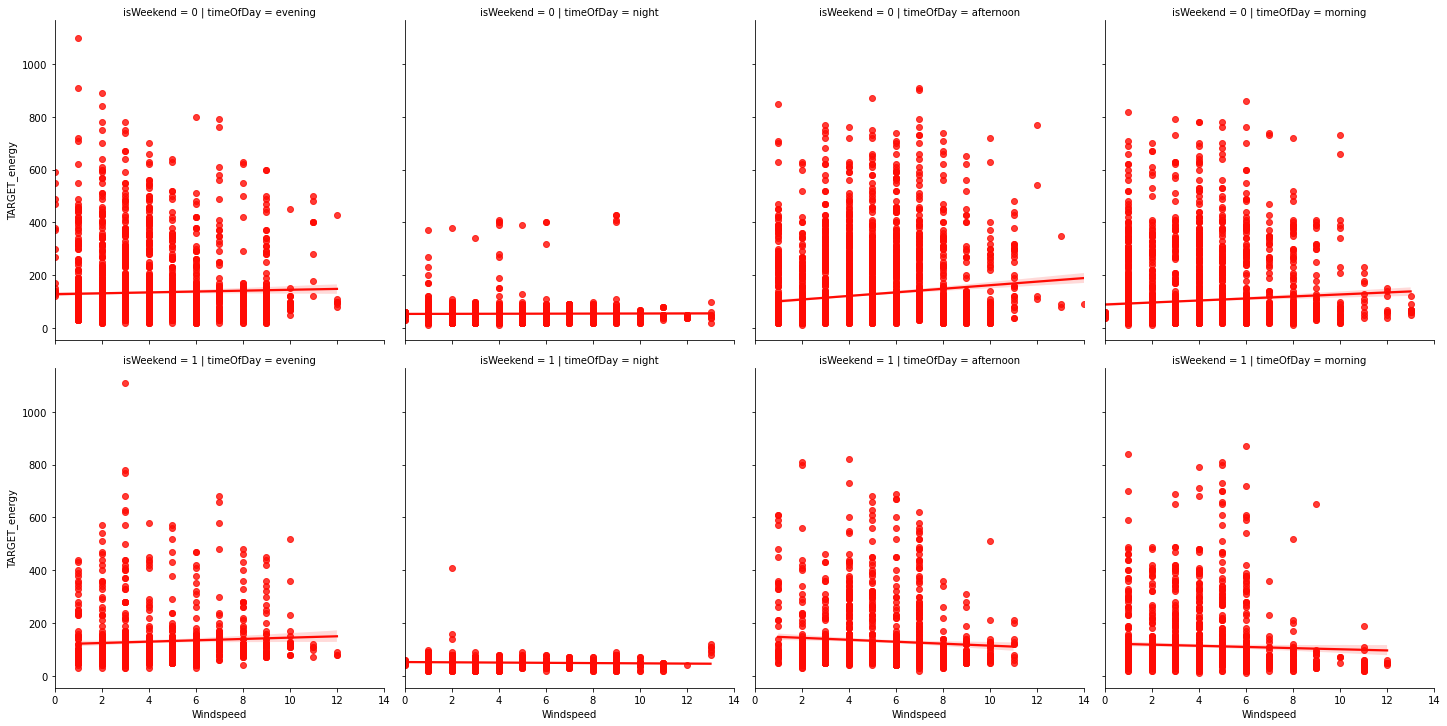

In [43]:
sbn.lmplot(x="Windspeed", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

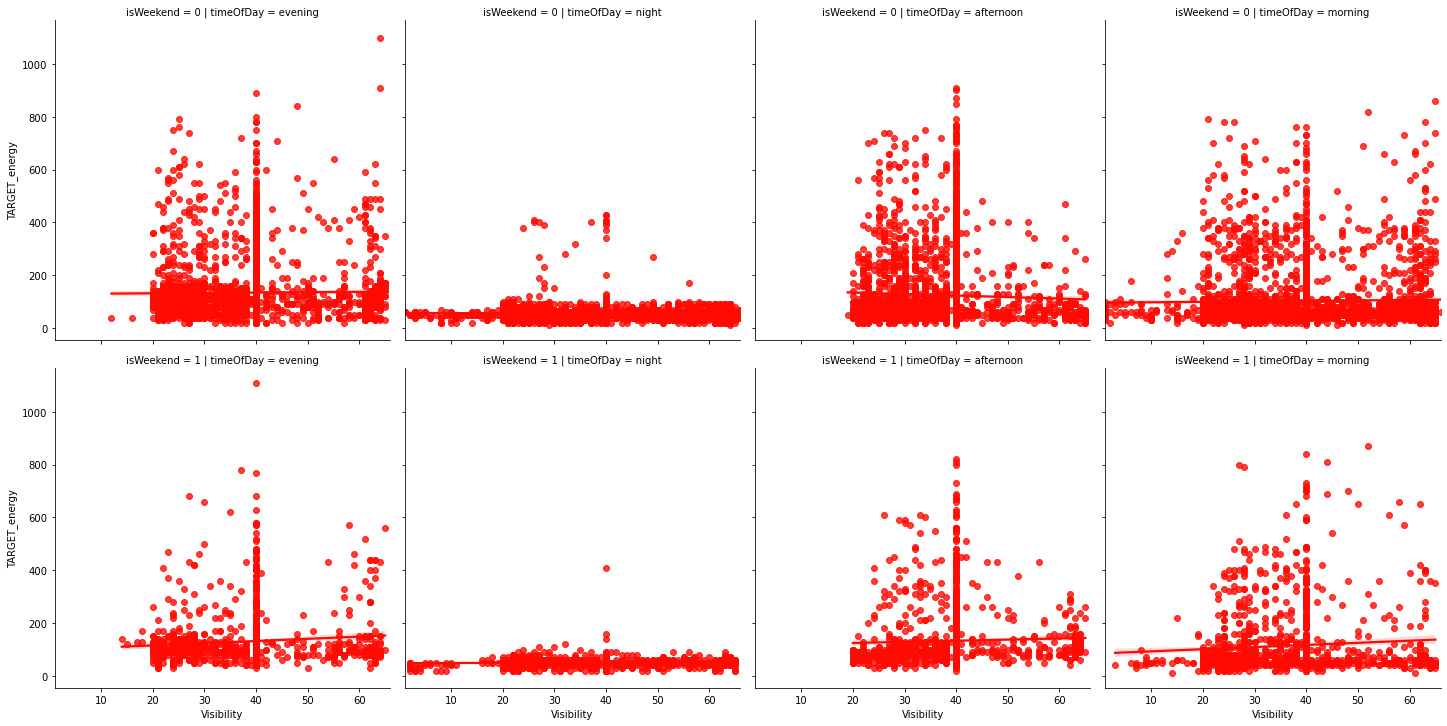

In [44]:
sbn.lmplot(x="Visibility", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

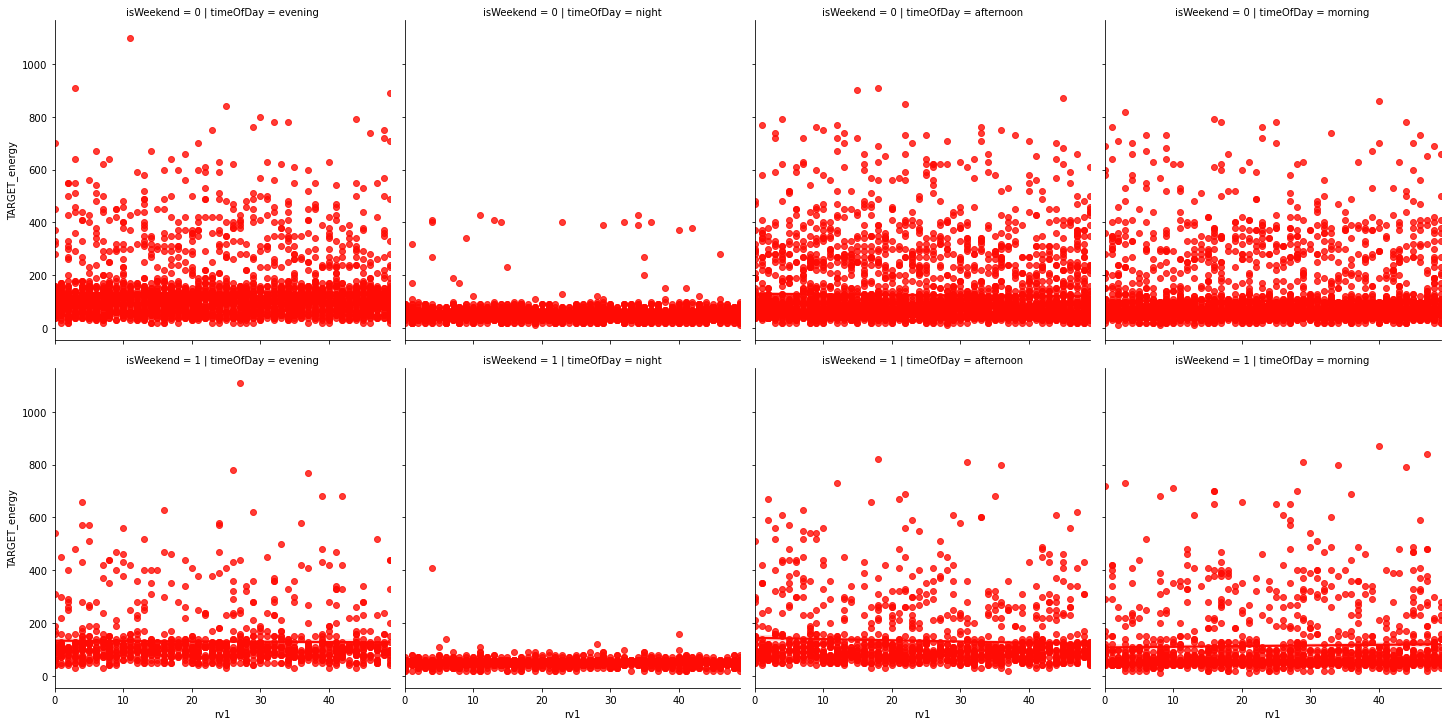

In [45]:
sbn.lmplot(x="rv1", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

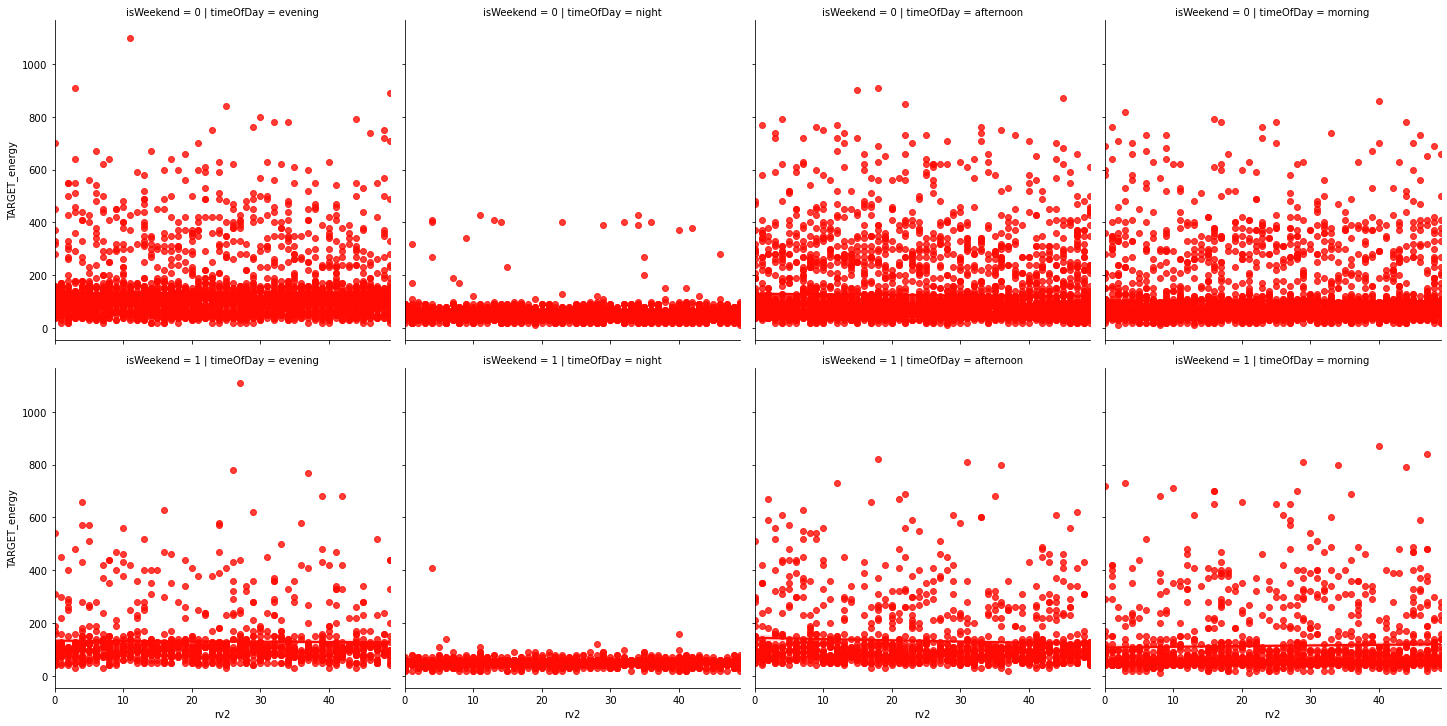

In [46]:
sbn.lmplot(x="rv2", y="TARGET_energy", col="timeOfDay", row = 'isWeekend', data=df_appliance)

C:\Users\SUNNY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


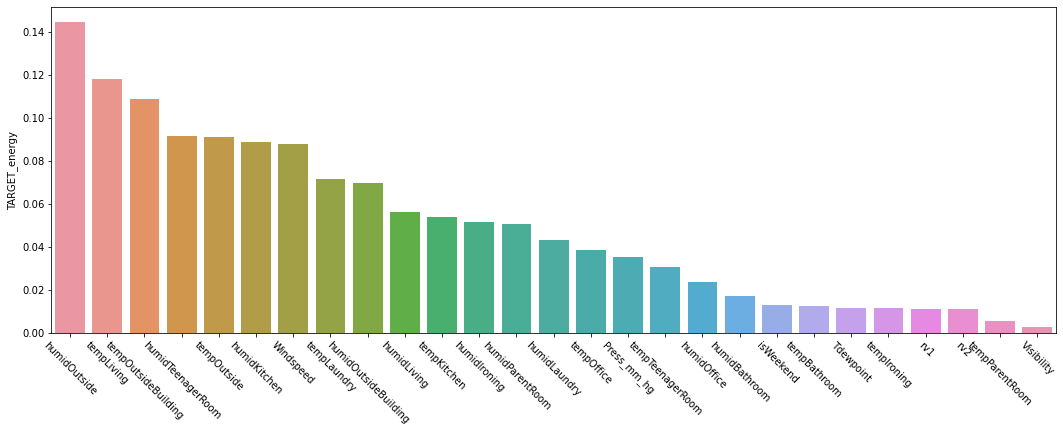

In [47]:
corr_w_t_e = df_appliance.corr()['TARGET_energy']
corr_w_t_e.columns = ['Variable', 'Correlation']

corr_w_t_e = corr_w_t_e[corr_w_t_e.index != 'TARGET_energy']
plot_order = abs(corr_w_t_e).sort_values(ascending=False).index.values

fg, ax = dplt.subplots(figsize=(18,6))
sbn.barplot(corr_w_t_e.index, abs(corr_w_t_e), order = plot_order)

ax.xaxis.set_tick_params(rotation= -45)

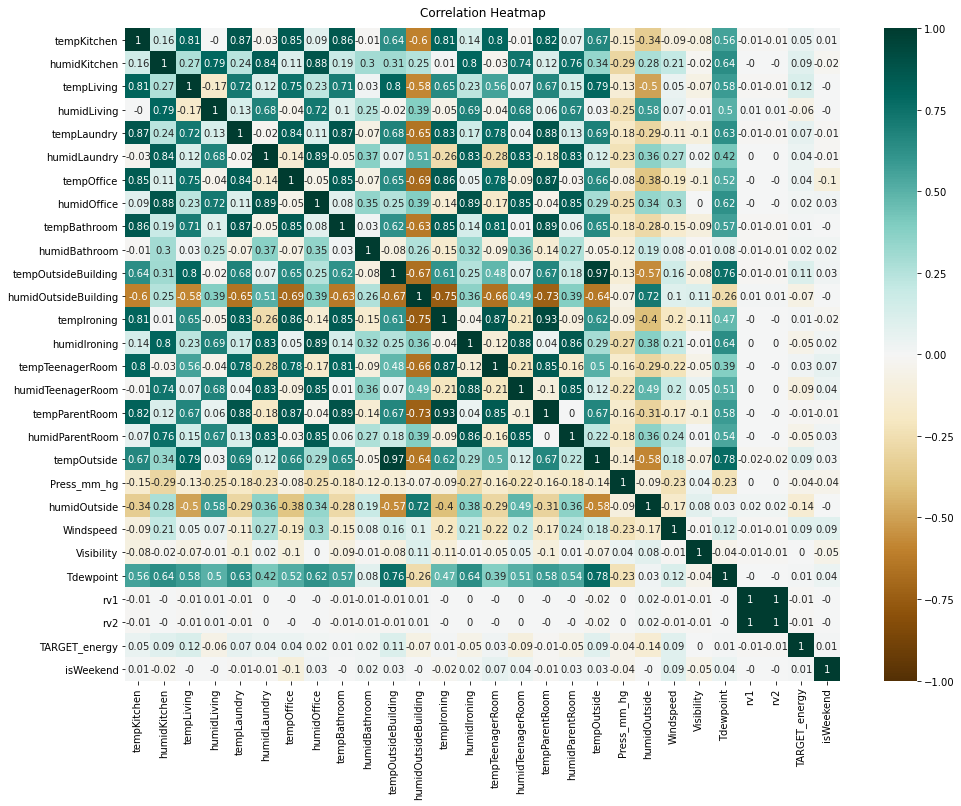

In [48]:
dplt.figure(figsize=(16, 12))

heatmap = sbn.heatmap(round(df_appliance.corr(),2), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

- High correlation between temperature of kitchen and laundry, humidity of office and laundry, temperature of parent room and temperature of bathroom.
- Visibility, Windspeed, random variable 1, random variable 2, Pressure, Humidity outside, Tdewpoint showed High negative correlation between them

In [49]:
def count_out_liers(col):

    s_c = np.std(col)
    m_c = np.mean(col)

    out_lier_dist = m_c + (3 * s_c)
    ct_out_lier = len(col[abs(col) > out_lier_dist])

    return ct_out_lier


dependant_val = ['tempKitchen', 'humidKitchen',
       'tempLiving', 'humidLiving', 'tempLaundry', 'humidLaundry',
       'tempOffice', 'humidOffice', 'tempBathroom', 'humidBathroom',
       'tempOutsideBuilding', 'humidOutsideBuilding', 'tempIroning',
       'humidIroning', 'tempTeenagerRoom', 'humidTeenagerRoom',
       'tempParentRoom', 'humidParentRoom', 'tempOutside', 'Press_mm_hg',
       'humidOutside', 'Windspeed', 'Visibility', 'Tdewpoint']

df_appliance[dependant_val].apply(count_out_liers)

tempKitchen               0
humidKitchen            109
tempLiving              195
humidLiving              21
tempLaundry              87
humidLaundry             10
tempOffice                0
humidOffice               0
tempBathroom             26
humidBathroom           568
tempOutsideBuilding     102
humidOutsideBuilding      0
tempIroning               0
humidIroning             16
tempTeenagerRoom          0
humidTeenagerRoom         0
tempParentRoom            0
humidParentRoom           0
tempOutside             132
Press_mm_hg               0
humidOutside              0
Windspeed                73
Visibility                0
Tdewpoint                 0
dtype: int64

Outliers in each attributes

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
rs = RobustScaler()

dependant_val = ['TARGET_energy']

categorical_ind_val = ['timeOfDay']
binary_ind_val = ['isWeekend']
continous_ind_vals = ['tempKitchen', 'humidKitchen',
       'tempLiving', 'humidLiving', 'tempLaundry', 'humidLaundry',
       'tempOffice', 'humidOffice', 'tempBathroom', 'humidBathroom',
       'tempOutsideBuilding', 'humidOutsideBuilding', 'tempIroning',
       'humidIroning', 'tempTeenagerRoom', 'humidTeenagerRoom',
       'tempParentRoom', 'humidParentRoom', 'tempOutside', 'Press_mm_hg',
       'humidOutside', 'Windspeed', 'Visibility', 'Tdewpoint']

all_modeling_features = dependant_val + categorical_ind_val + binary_ind_val + continous_ind_vals

df_clean = df_appliance[all_modeling_features]

preprocessor = ColumnTransformer(
    [
        ('categoricals', OneHotEncoder(dtype = 'float32'), categorical_ind_val),
        ('numericals', RobustScaler(), continous_ind_vals)
    ],
    remainder = 'passthrough'
)



# Baseline Model

In [51]:
from sklearn.model_selection import train_test_split

X_tn, X_tt, y_tn, y_tt = train_test_split(df_clean.loc[ : , df_clean.columns != 'TARGET_energy'],
                                                    df_clean['TARGET_energy'],  
                                                    test_size=0.2)


print(X_tn.shape)
print(X_tt.shape)
print(y_tn.shape)
print(y_tt.shape)


(15788, 26)
(3947, 26)
(15788,)
(3947,)


### Fitting an Elastic Net Regression model with all posible variables

In [52]:
et = ElasticNet()
et_params = {'et__alpha': [0.01, 0.1, 0.25, 0.5 ,1],
               'et__l1_ratio' : [0.01, 0.1, 0.25, 0.5, 1]}

pipe_et = Pipeline([('processor', preprocessor), ('et', et)])

et_search = GridSearchCV(pipe_et, et_params, cv = 10, verbose = 1)
et_search.fit(X_tn, y_tn)

print("Best Parameters:", et_search.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best Parameters: {'et__alpha': 0.01, 'et__l1_ratio': 1}


In [53]:
# Using best parameters(Parameter tuning)
et_final = Pipeline([('processor', preprocessor), ('et', ElasticNet(alpha=0.01, l1_ratio=1))])
et_final.fit(X_tn, y_tn)


y_pred_et = et_final.predict(X_tt)
mse_et = mean_squared_error(y_tt, y_pred_et)

print("Elastic_Net_(full_variables)MSE:", round(mse_et,2))

Elastic_Net_(full_variables)MSE: 8251.43


In [54]:


transformed_cols = ['isMorning', 'isAfternoon', 'isEvening', 'isNight', 'isWeekend', 'tempKitchen', 'humidKitchen',
       'tempLiving', 'humidLiving', 'tempLaundry', 'humidLaundry',
       'tempOffice', 'humidOffice', 'tempBathroom', 'humidBathroom',
       'tempOutsideBuilding', 'humidOutsideBuilding', 'tempIroning',
       'humidIroning', 'tempTeenagerRoom', 'humidTeenagerRoom',
       'tempParentRoom', 'humidParentRoom', 'tempOutside', 'Press_mm_hg',
       'humidOutside', 'Windspeed', 'Visibility', 'Tdewpoint']

X_tn_transformed = pd.DataFrame(preprocessor.fit_transform(X_tn), columns = transformed_cols)
X_tt_transformed = pd.DataFrame(preprocessor.fit_transform(X_tt), columns = transformed_cols)

X_tn_transformed.head()

,isMorning,isAfternoon,isEvening,isNight,isWeekend,tempKitchen,humidKitchen,tempLiving,humidLiving,tempLaundry,...,tempTeenagerRoom,humidTeenagerRoom,tempParentRoom,humidParentRoom,tempOutside,Press_mm_hg,humidOutside,Windspeed,Visibility,Tdewpoint
0,0.0,0.0,0.0,1.0,0.5,-0.833333,0.000000,-0.833333,0.000000,-0.4,...,-0.571429,0.5,-0.500000,0.285714,0.8,-1.095238,0.666667,0.000000,-0.333333,0.0
1,1.0,0.0,0.0,0.0,-0.5,-0.333333,0.000000,-0.833333,-0.666667,-0.2,...,-0.857143,-0.5,0.166667,0.428571,0.2,-1.285714,-0.666667,-1.636364,-0.333333,0.0
2,0.0,0.0,1.0,0.0,-0.5,-0.666667,-1.333333,0.000000,-0.666667,-0.2,...,-0.142857,0.0,0.000000,-0.857143,1.2,0.333333,0.333333,1.818182,-0.666667,0.0
3,0.0,0.0,0.0,1.0,0.0,0.500000,-0.333333,0.833333,0.333333,0.2,...,0.428571,0.5,0.666667,-0.285714,-0.3,0.619048,-0.666667,0.727273,0.166667,0.0
4,0.0,0.0,0.0,1.0,1.0,0.333333,0.000000,0.500000,0.666667,0.2,...,0.000000,1.5,0.500000,0.285714,-0.7,0.666667,-0.333333,-1.545455,0.666667,0.0


In [55]:
def get_backwards_selection(cols, X_tn, y_tn):

    model_result = sm.OLS(y_tn, X_tn[cols]).fit()
    pvals = model_result.pvalues

    while any(model_result.pvalues > 0.01):

        max_cf_val = model_result.pvalues.sort_values()[-1]
        max_cf_name = model_result.pvalues.sort_values().index[-1]

        print('Removing:', max_cf_name, 'Pval:', str(round(max_cf_val, 3)))
        cols.remove(max_cf_name)

        model_result = sm.OLS(y_tn, X_tn[cols]).fit()


    return model_result

reduced_regression = get_backwards_selection(transformed_cols, X_tn_transformed, y_tn.values.ravel())
reduced_regression.summary()

Removing: tempOutside Pval: 0.723
Removing: Visibility Pval: 0.61
Removing: tempBathroom Pval: 0.511
Removing: tempOutsideBuilding Pval: 0.506
Removing: tempOffice Pval: 0.236
Removing: humidOffice Pval: 0.273
Removing: Windspeed Pval: 0.083


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     150.1
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        21:31:01   Log-Likelihood:                -94525.
No. Observations:               15788   AIC:                         1.891e+05
Df Residuals:                   15766   BIC:                         1.893e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
isMorning              106.9316      2.402     44.509      0.000     102.223     111.641
isAfternoon            109.0976      2.551     42.763      0.000     104.097     114.098
isEvening              112.4610      2.150     52.319      0.000     108.248     116.674
isNight                 59.2573      2.137     27.726      0.000      55.068      63.447
isWeekend                9.2122      3.063      3.008      0.003       3.209      15.215
tempKitchen             76.3732      4.132     18.484      0.000      68.274      84.472
humidKitchen           -44.8951      4.051    -11.083      0.000     -52.835     -36.955
tempLiving             -64.6829      4.148    -15.594      0.000     -72.814     -56.552
humidLiving             56.1505      3.039     18.475      0.000      50.193      62.108
tempLaundry             31.9803      3.553      9.002      0.000      25.017      38.944
humidLaundry             9.4704      2.893      3.274      0.001       3.800      15.140
humidBathroom           28.5888      5.411      5.283      0.000      17.982      39.195
humidOutsideBuilding    11.2124      3.830      2.928      0.003       3.706      18.719
tempIroning            -23.2276      3.629     -6.401      0.000     -30.341     -16.115
humidIroning            23.2210      3.002      7.735      0.000      17.336      29.106
tempTeenagerRoom       -18.0203      3.013     -5.981      0.000     -23.926     -12.115
humidTeenagerRoom      -45.4206      3.014    -15.068      0.000     -51.329     -39.512
tempParentRoom          -8.4262      2.736     -3.080      0.002     -13.788      -3.064
humidParentRoom        -20.8652      5.652     -3.691      0.000     -31.944      -9.786
Press_mm_hg              9.9722      2.537      3.930      0.000       4.999      14.946
humidOutside             7.7350      1.126      6.868      0.000       5.528       9.942
Tdewpoint                5.2152      1.812      2.879      0.004       1.664       8.766
==============================================================================
Omnibus:                    11035.519   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163846.227
Skew:                           3.268   Prob(JB):                         0.00
Kurtosis:                      17.365   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
significant_vals = ['isMorning', 'isAfternoon', 'isEvening', 'isNight', 'humidLiving',
       'tempKitchen', 'tempLiving', 'isWeekend', 'humidKitchen',
       'humidTeenagerRoom', 'humidIroning', 'tempLaundry', 'humidParentRoom',
       'tempTeenagerRoom', 'humidBathroom', 'tempIroning', 'humidOutside',
       'Visibility', 'Tdewpoint', 'humidOutsideBuilding', 'Windspeed']

In [57]:

rr_final = Pipeline([('lr', LinearRegression())])
rr_final.fit(X_tn_transformed[significant_vals], y_tn)

y_pred_rr = rr_final.predict(X_tt_transformed[significant_vals])
mse_lr = mean_squared_error(y_tt, y_pred_rr)

print("Linear Regression (reduced variables) MSE:", round(mse_lr,2))

Linear Regression (reduced variables) MSE: 8480.55


In [58]:

red_et_final = Pipeline([('lr', ElasticNet(alpha=0.01, l1_ratio=1))])
red_et_final.fit(X_tn_transformed[significant_vals], y_tn)

y_pred_et_reg = red_et_final.predict(X_tt_transformed[significant_vals])
mse_et_red = mean_squared_error(y_tt, y_pred_et_reg)

print("Elastic Net (reduced variables) MSE:", round(mse_et_red,2))

Elastic Net (reduced variables) MSE: 8471.47


### Fitting an Random Forest Regressor model with all posible variables

Turn strings into numbers

In [59]:
X_tn = X_tn.replace('afternoon', 3)
X_tn = X_tn.replace('morning', 0)
X_tn = X_tn.replace('night', 2)
X_tn = X_tn.replace('evening', 1)
X_tt = X_tt.replace('afternoon', 3)
X_tt = X_tt.replace('morning', 0)
X_tt = X_tt.replace('night', 2)
X_tt = X_tt.replace('evening', 1)

X_tn.head()

,timeOfDay,isWeekend,tempKitchen,humidKitchen,tempLiving,humidLiving,tempLaundry,humidLaundry,tempOffice,humidOffice,...,tempTeenagerRoom,humidTeenagerRoom,tempParentRoom,humidParentRoom,tempOutside,Press_mm_hg,humidOutside,Windspeed,Visibility,Tdewpoint
12932,2,0,22,34,20,35,22,36,22,32,...,22,38,20,37,8,764,60,5,40,1
10462,3,0,20,37,20,35,20,37,22,35,...,20,36,18,41,9,758,56,1,22,1
450,0,0,20,35,16,40,20,37,19,33,...,22,41,19,40,0,768,90,4,60,-1
9933,2,0,21,42,19,45,23,39,21,39,...,23,45,20,44,4,753,96,1,48,4
4757,2,0,23,41,20,43,24,39,23,40,...,24,42,22,43,8,749,97,2,23,7


In [60]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(X_tn, y_tn)

RandomForestRegressor(random_state=1)

In [61]:


from sklearn.model_selection import GridSearchCV, KFold

parameters = {
    'max_depth': [800,1000,1500],
    'min_samples_leaf': [5,8,10],
    'min_samples_split': [5,10,15],
    'n_estimators': [40,60,100],
    'random_state':[1]    
}


grid_randomforest_model = GridSearchCV(RandomForestRegressor(), parameters, cv=10)

grid_randomforest_model = grid_randomforest_model.fit(X_tn, y_tn)
print(grid_randomforest_model.best_estimator_)
print(grid_randomforest_model.best_params_)

RandomForestRegressor(max_depth=800, min_samples_leaf=5, min_samples_split=5,
                      random_state=1)
{'max_depth': 800, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 1}


In [62]:
best_random_forest_model = grid_randomforest_model.best_estimator_

y_pred_rf2 = best_random_forest_model.predict(X_tt)
mse_rf2 = mean_squared_error(y_tt, y_pred_rf2)


print("RandomForestRegressor MSE:", round(mse_rf2,2))

RandomForestRegressor MSE: 4805.86


Compute the significant Values

In [64]:
# Final Model Rankings  (Mean Squared Error)
dict_model_result = {"Linear Regression (Reduced Variables)" : round(mse_lr,3),
                     "Elastic Net (Reduced Variables)": round(mse_et_red, 3),
                "RandomForestRegressor" : round(mse_rf2,3)}

model_result_df = pd.DataFrame(data=dict_model_result.items(), columns = ['Variable', 'MSE'])
model_result_df = model_result_df.set_index('Variable')
model_result_df['RMSE'] = round(np.sqrt(model_result_df['MSE']),2)

model_result_df.sort_values(by=['MSE'])

,MSE,RMSE
Variable,,
RandomForestRegressor,4805.863,69.32
Elastic Net (Reduced Variables),8471.467,92.04
Linear Regression (Reduced Variables),8480.549,92.09


Random Forest Regressor performs the best out of all the 3 models.

# Model Performance & Ultimate Judgement

Text(0.5, 0.01, 'Fitted Values')

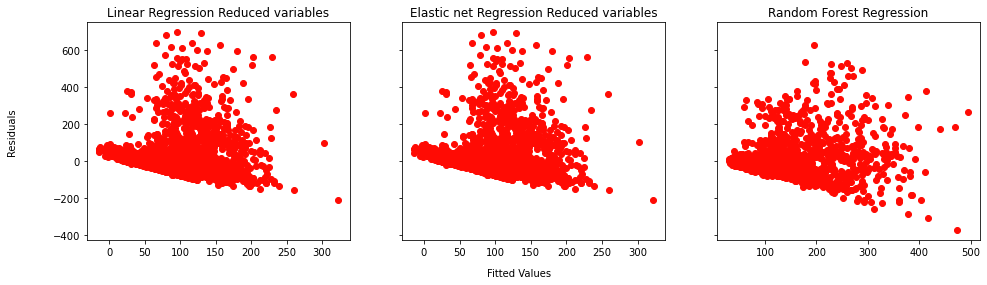

In [65]:
fig, axs = dplt.subplots(1, 3, figsize=(16,4), sharey=True)
axs[0].scatter(y_pred_rr,y_tt-y_pred_rr)
axs[0].set_title('Linear Regression Reduced variables')

axs[1].scatter(y_pred_et_reg,y_tt-y_pred_et_reg)
axs[1].set_title('Elastic net Regression Reduced variables')

axs[2].scatter(y_pred_rf2,y_tt-y_pred_rf2)
axs[2].set_title('Random Forest Regression')

fig.text(0.06, 0.5, 'Residuals', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'Fitted Values', ha='center', va='center')

Elastic net regression and Random Forest Regressor model has mean random residuals closer to 0

Text(0.5, 0.01, 'True Values')

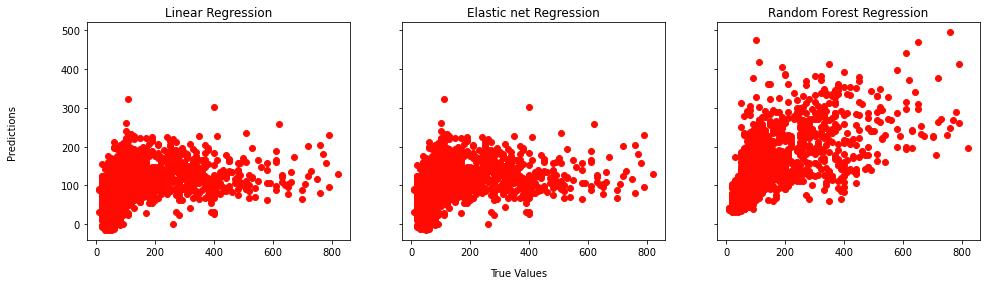

In [66]:
fig, axs = dplt.subplots(1, 3, figsize=(16,4), sharey=True)
axs[0].scatter(y_tt,y_pred_rr)
axs[0].set_title('Linear Regression')

axs[1].scatter(y_tt,y_pred_et_reg)
axs[1].set_title('Elastic net Regression')

axs[2].scatter(y_tt,y_pred_rf2)
axs[2].set_title('Random Forest Regression')

fig.text(0.06, 0.5, 'Predictions', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'True Values', ha='center', va='center')

It can be concluded that the Random Forest Regressor is the best model

In [67]:
factorlist = significant_vals
factors = np.array(X_tt)

importances = list(best_random_forest_model.feature_importances_)

factor_importances = [(factor, round(importance, 2)) 
    for factor, importance in zip(factorlist, importances)]

factor_importances = sorted(factor_importances, key = lambda X_tt: X_tt[1], reverse = True)
 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in factor_importances];

Variable: isMorning            Importance: 0.12
Variable: isNight              Importance: 0.06
Variable: tempLaundry          Importance: 0.06
Variable: tempTeenagerRoom     Importance: 0.06
Variable: tempKitchen          Importance: 0.05
Variable: tempLiving           Importance: 0.05
Variable: isWeekend            Importance: 0.04
Variable: humidKitchen         Importance: 0.04
Variable: tempIroning          Importance: 0.04
Variable: humidTeenagerRoom    Importance: 0.03
Variable: humidParentRoom      Importance: 0.03
Variable: Visibility           Importance: 0.03
Variable: humidOutsideBuilding Importance: 0.03
Variable: isEvening            Importance: 0.02
Variable: humidLiving          Importance: 0.02
Variable: humidIroning         Importance: 0.02
Variable: humidBathroom        Importance: 0.02
Variable: humidOutside         Importance: 0.02
Variable: Windspeed            Importance: 0.02
Variable: isAfternoon          Importance: 0.01
Variable: Tdewpoint            Importanc

Time of the day is the important feature along with temperature of teenager room and laundary

References:
https://www.kaggle.com/code/rrakzz/r2-68-accuracy-95